# **3.1 Assignment I: Exploratory Data Analysis**
## Hernan Vinicio Lopez Morocho 


### 1.Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('train.csv')

We check the column datetime to see if it has object format, so we change to date time format

In [3]:
df["datetime"] = pd.to_datetime(df["datetime"])



### 2.Check the data type of each column. How many rows are there in the dataset ? Does the dataset contain any missing values ?

In [4]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There aren't null values and it has 10886 rows

### 3. Using the date column, create new columns for: year, month, day of the week and hour of the day.

In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

### 4.Rename the values in the season column to spring, summer, fall and winter

I will see how many season and in which date

In [8]:
season = (df['datetime'] >= '2011-12-01') & (df['datetime'] <= '2011-12-01')
filtered = df.loc[season]
filtered

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4966,2011-12-01,4,0,1,1,11.48,12.88,52,22.0028,1,19,20,2011,12,1,0


In [9]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
df['season'] = df['season'].replace({1 :'spring',2: 'summer',3: 'autumn',4: 'winter'})
df.tail()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,winter,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


### 5.Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [11]:
reg = df.groupby('year')[['casual','registered']].sum()
reg

,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


### 6.Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?

In [12]:
mseas = df.groupby('season')[['count']].mean()
mseas = mseas.sort_values(by = 'count', ascending=False)
mseas

,count
season,
autumn,234.417124
summer,215.251372
winter,198.988296
spring,116.343261


The Autumn season has the highest mean rental.

### 7.Are more bikes rented by registered users on working or non-working days ? Does the answer differ for non-registered users ? Is the answer the same for both years ?

In [13]:
df.groupby('workingday')[['registered']].sum()

,registered
workingday,
0,448835
1,1244506


In [14]:
df.groupby('workingday')[['casual']].sum()

,casual
workingday,
0,206037
1,186098


There are more rented bikes in working days

In [15]:
pivot = df.pivot_table(values=['casual','registered'],
                       index='year',
                       columns=['workingday'],
                       aggfunc='sum')
pivot

casual         registered        
workingday       0       1          0       1
year                                         
2011         83099   72718     167492  458670
2012        122938  113380     281343  785836

More registered users on working days.
More casual users on nonworking days.
Yes, by year keep the same result.


### 8.Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

In [16]:

df_2011 = df[df['year']== 2011]
rent2011 = df_2011.groupby('month')['count'].sum()
rent2011 = rent2011.sort_values(ascending=False)
rent2011

month
7     92848
6     89776
8     83296
5     79713
10    79522
9     79104
11    70889
12    61183
4     50517
3     38735
2     32844
1     23552
Name: count, dtype: int64

In [17]:
df_2012 = df[df['year']== 2012]
rent2012 = df_2012.groupby('month')['count'].sum()
rent2012 = rent2012.sort_values(ascending=False)
rent2012

month
9     133425
6     130957
8     130220
10    127912
7     121769
5     120434
4     116885
11    105551
12     98977
3      94766
2      66269
1      56332
Name: count, dtype: int64

In 2011, July is the month with the highest number of bikes reserved.
In 2012, September is the month with the most bike reserved.
January is the lowest for the two yers


### 9.Which type of weather have the highest and lowest mean of the hourly total rentals count ?

In [18]:
df_weather = df.groupby('weather')['count'].agg('mean')
df_weather1 = df_weather.sort_values(ascending=False)
df_weather1

weather
1    205.236791
2    178.955540
4    164.000000
3    118.846333
Name: count, dtype: float64

1: Clear, Few clouds, Partly cloudy, Partly cloudy has the highest mean
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered Clouds (the lowest mean)
When the weather is better, the people use the bikes often.

### 10.Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

In [19]:
df[['temp','atemp','humidity','windspeed','count']].corr()


,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


The highest correlation between total rentals count  is with temperature.

### 11.Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.

In [20]:
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']
df['day_period'] = pd.cut(df['hour'], bins = bins, labels = labels, right = False)
df.tail()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_period
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,evening
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,evening
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,evening
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,evening
10885,2012-12-19 23:00:00,winter,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,evening


### 12.Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

In [21]:
piv_day = df.pivot_table(values= 'count',
               index = 'day_period',
               columns = 'workingday',
               aggfunc = 'mean')
piv_day
               

C:\Users\herna\AppData\Local\Temp\ipykernel_44664\3154637316.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_day = df.pivot_table(values= 'count',


workingday,0,1
day_period,,
night,44.052083,16.217582
morning,157.772414,234.353763
afternoon,371.022989,266.196141
evening,180.182759,251.054662


We conclude on working days "the afternoon is the highest and night the lowest."
On nonworking day is the same "the afternoon is the highest and night the lowest."
I can say is related with how the people spend the days in the afternoon, they go outside to enjoy the afternoon. Nonworking days has more users than working days.

# **3.2 Assignment II: Exploratory Data Analysis**


### 1.Plot the distributions of all the numerical columns in the dataset using histograms

In [22]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,night


In [43]:
print(df['season'].unique())

['spring' 'summer' 'autumn' 'winter']


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

TEMPERATURE


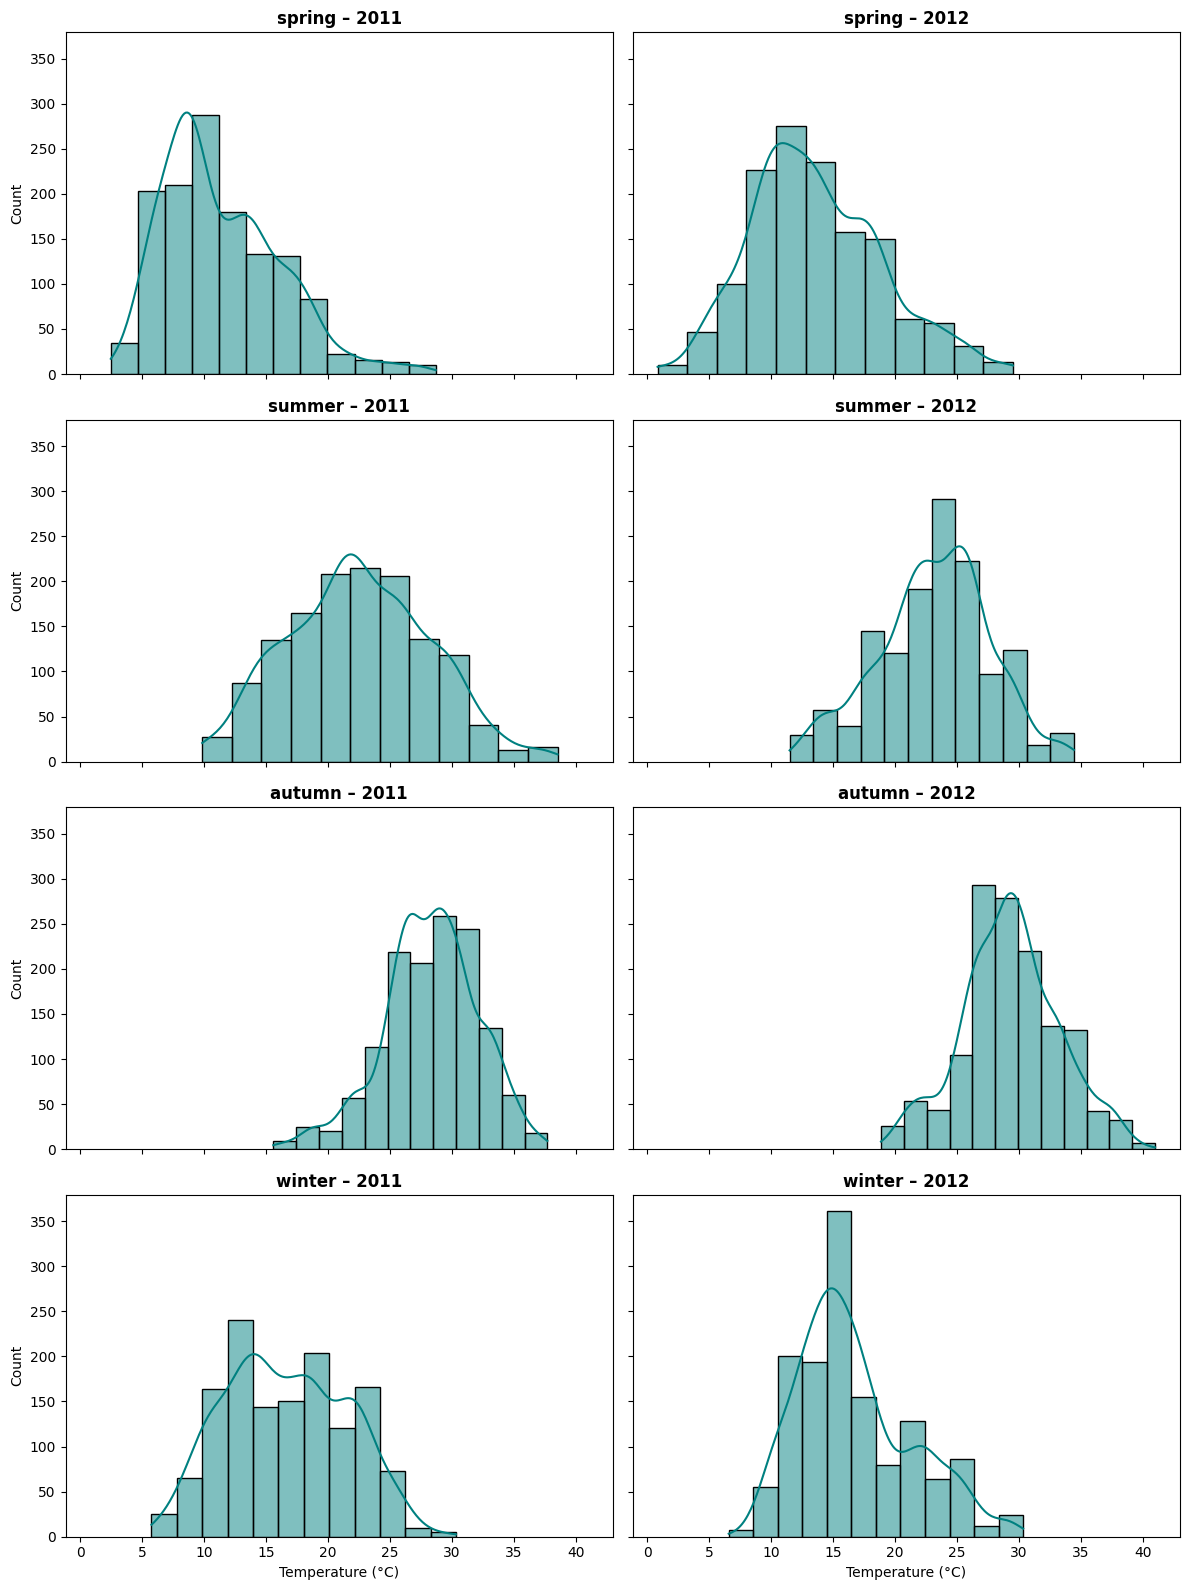

In [52]:
seasons = ["spring", "summer", "autumn", "winter"]
years = [2011, 2012]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='temp',
            bins=12,
            kde=True,
            color='teal',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Temperature (°C)")
        ax.set_ylabel("Count")

print('TEMPERATURE')
plt.tight_layout()
plt.show()

TOTAL USERS


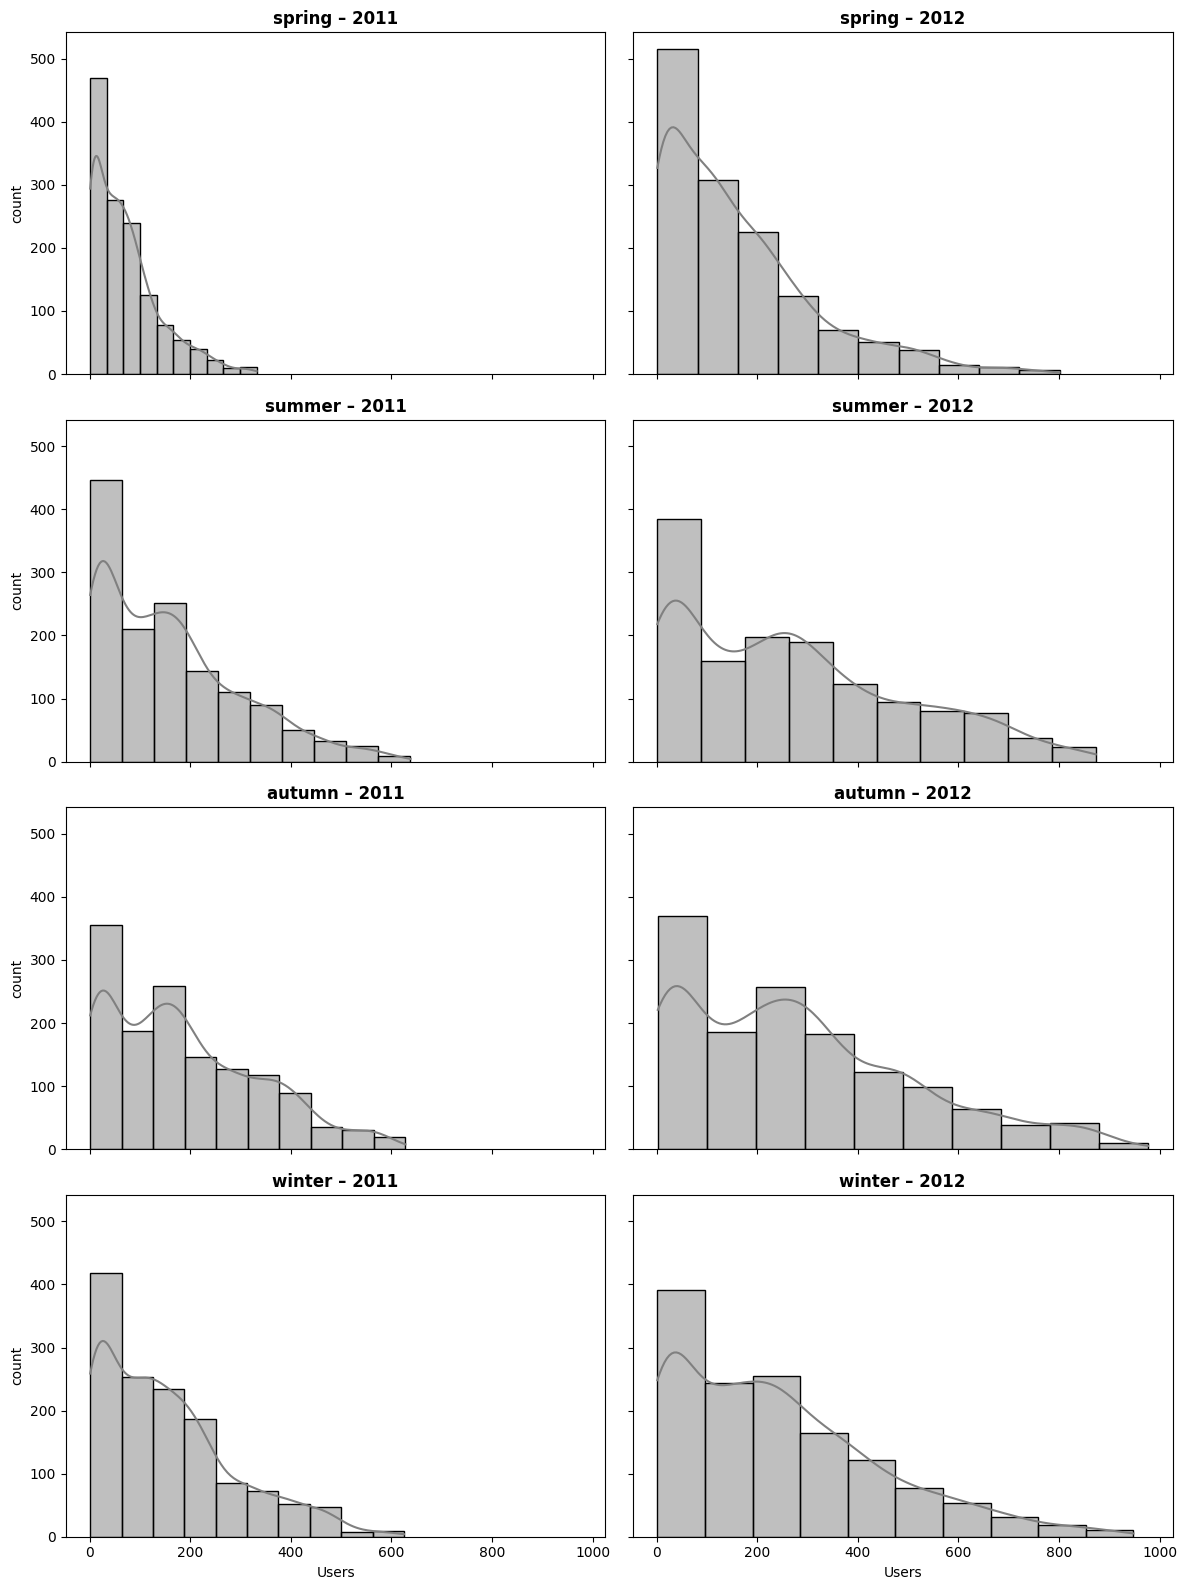

In [59]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='count',
            bins=10,
            kde=True,
            color='gray',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Users")
        ax.set_ylabel("count")
print('TOTAL USERS')
plt.tight_layout()
plt.show()


Humidity


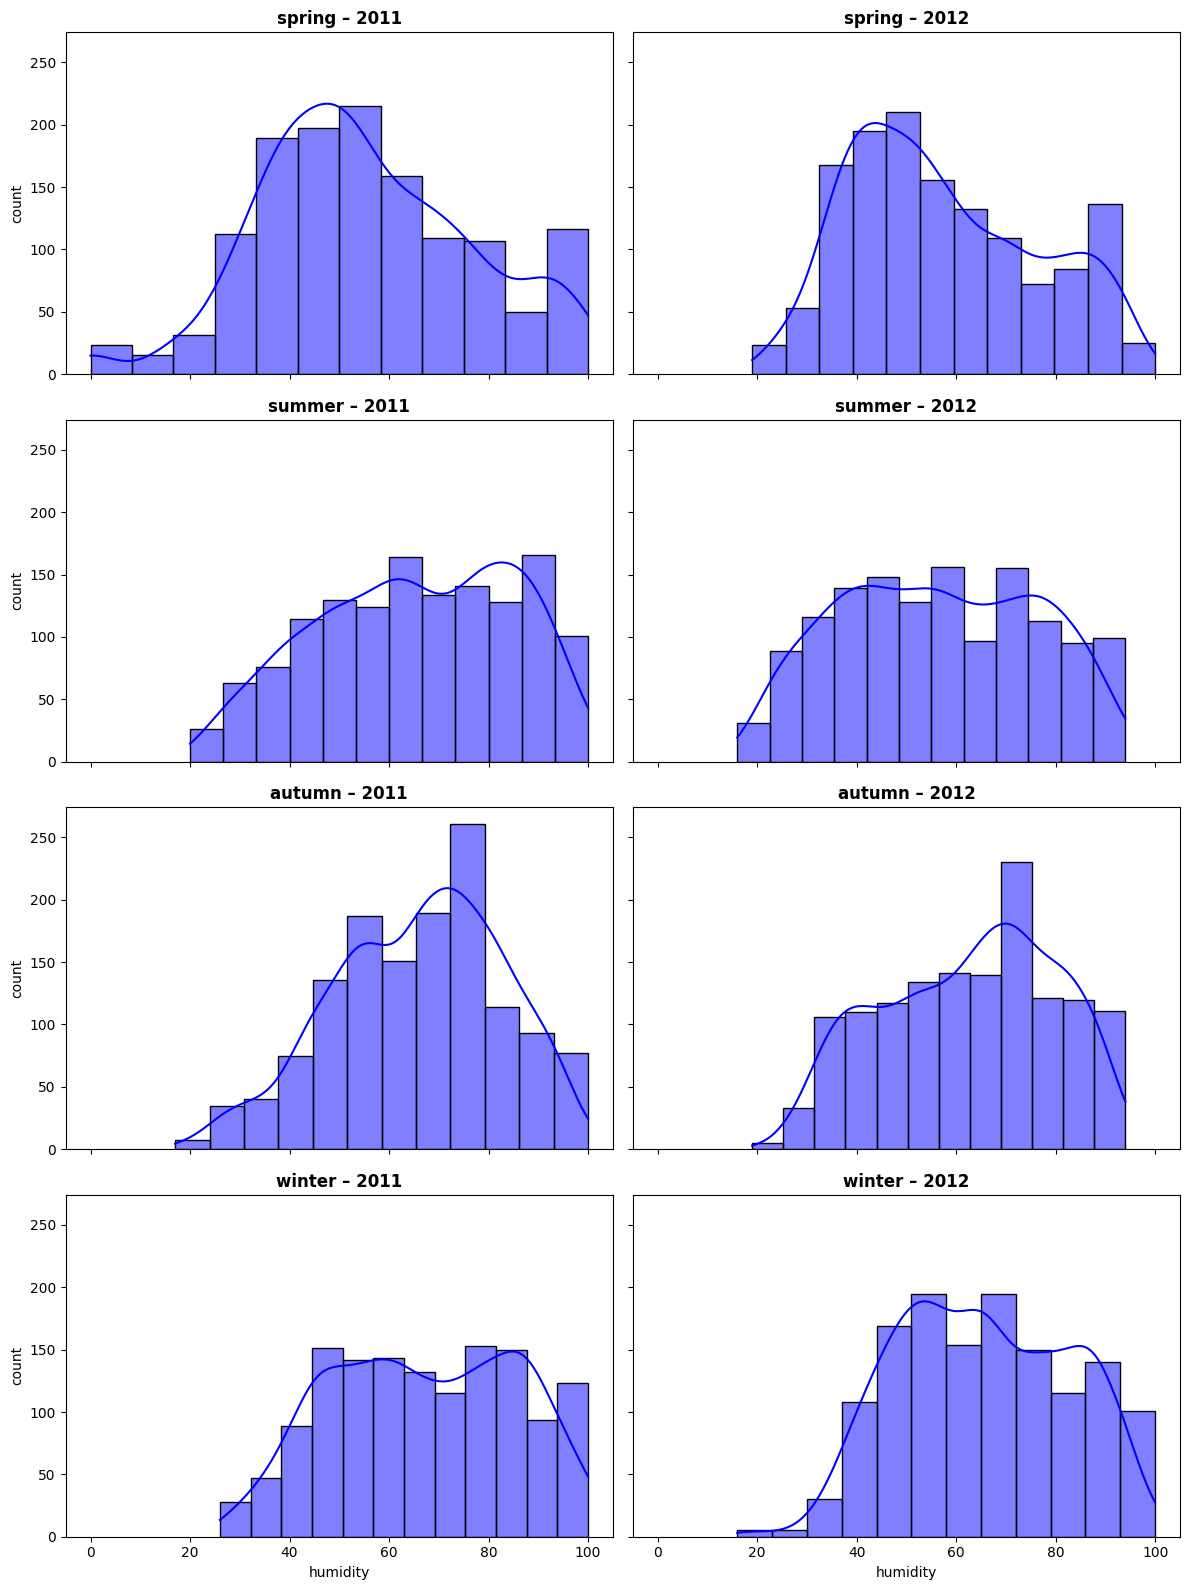

In [63]:


years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='humidity',
            bins=12,
            kde=True,
            color='blue',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("humidity")
        ax.set_ylabel("count")
print('Humidity')
plt.tight_layout()
plt.show()


WIND SPEED


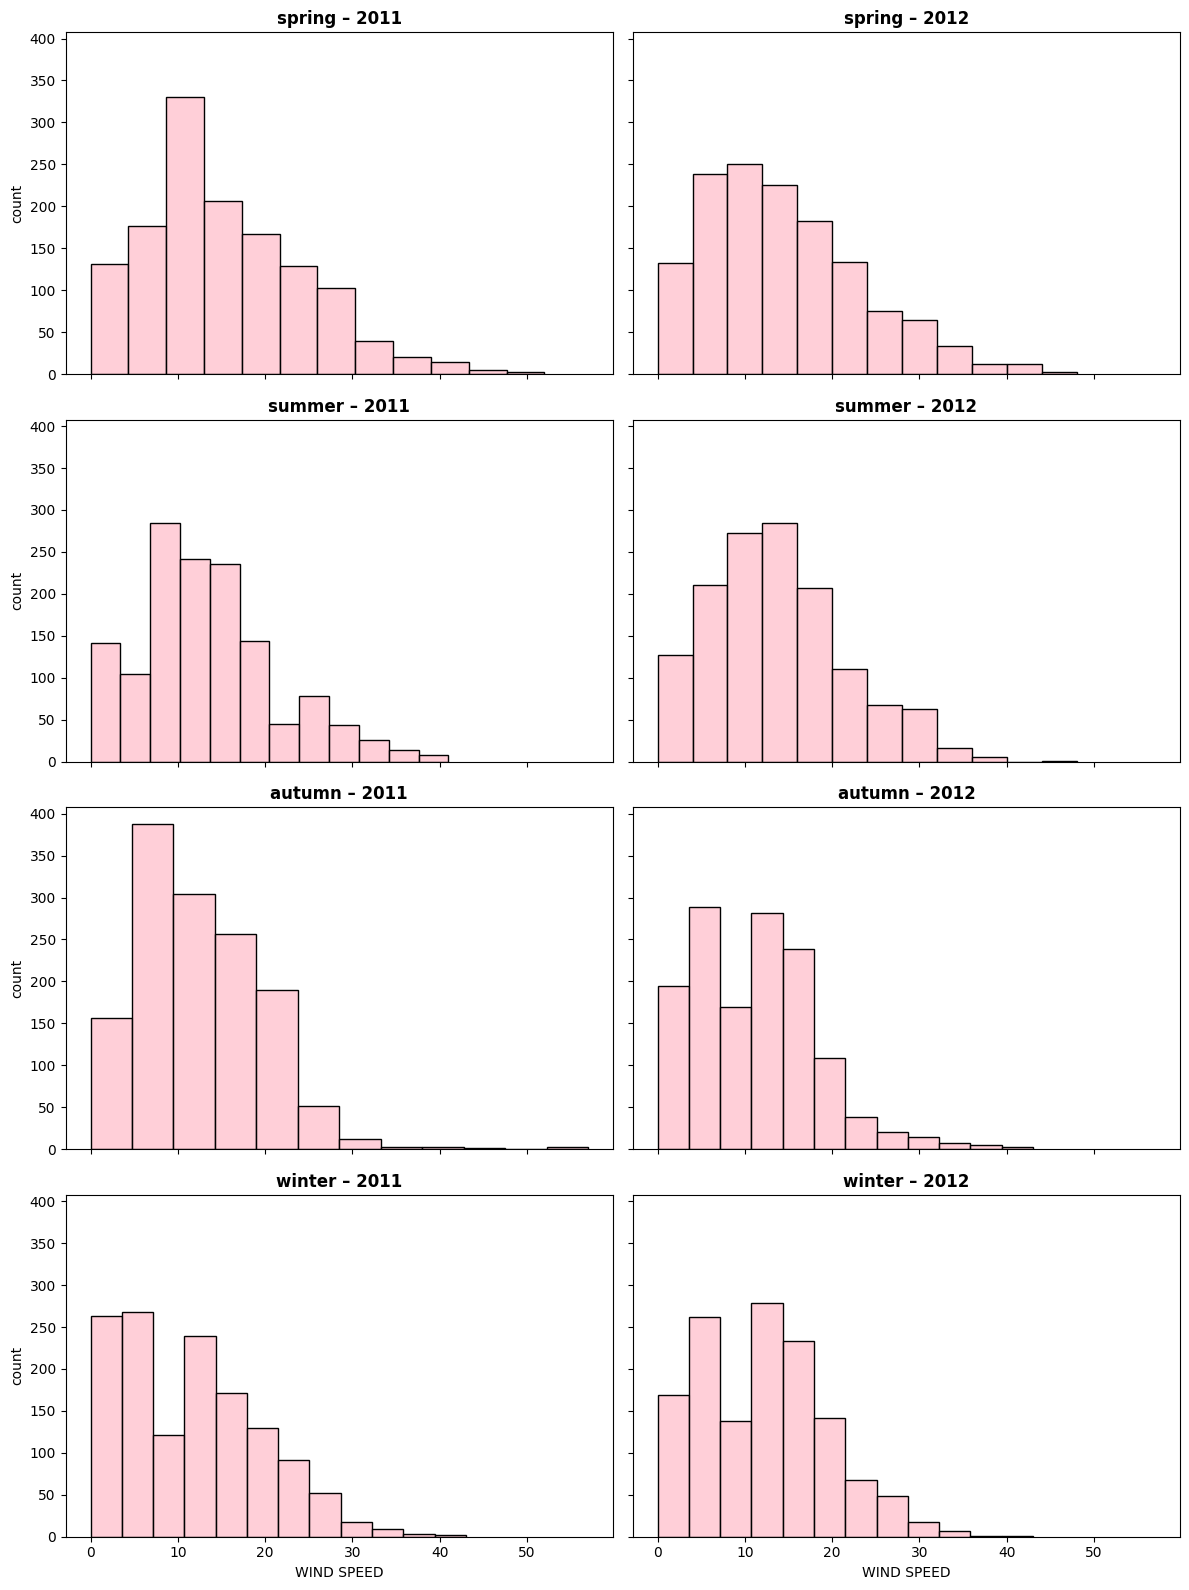

In [76]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='windspeed',
            bins=12,
            ##kde=True,
            color='pink',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("WIND SPEED")
        ax.set_ylabel("count")
        
print('WIND SPEED')
plt.tight_layout()
plt.show()


Casual users


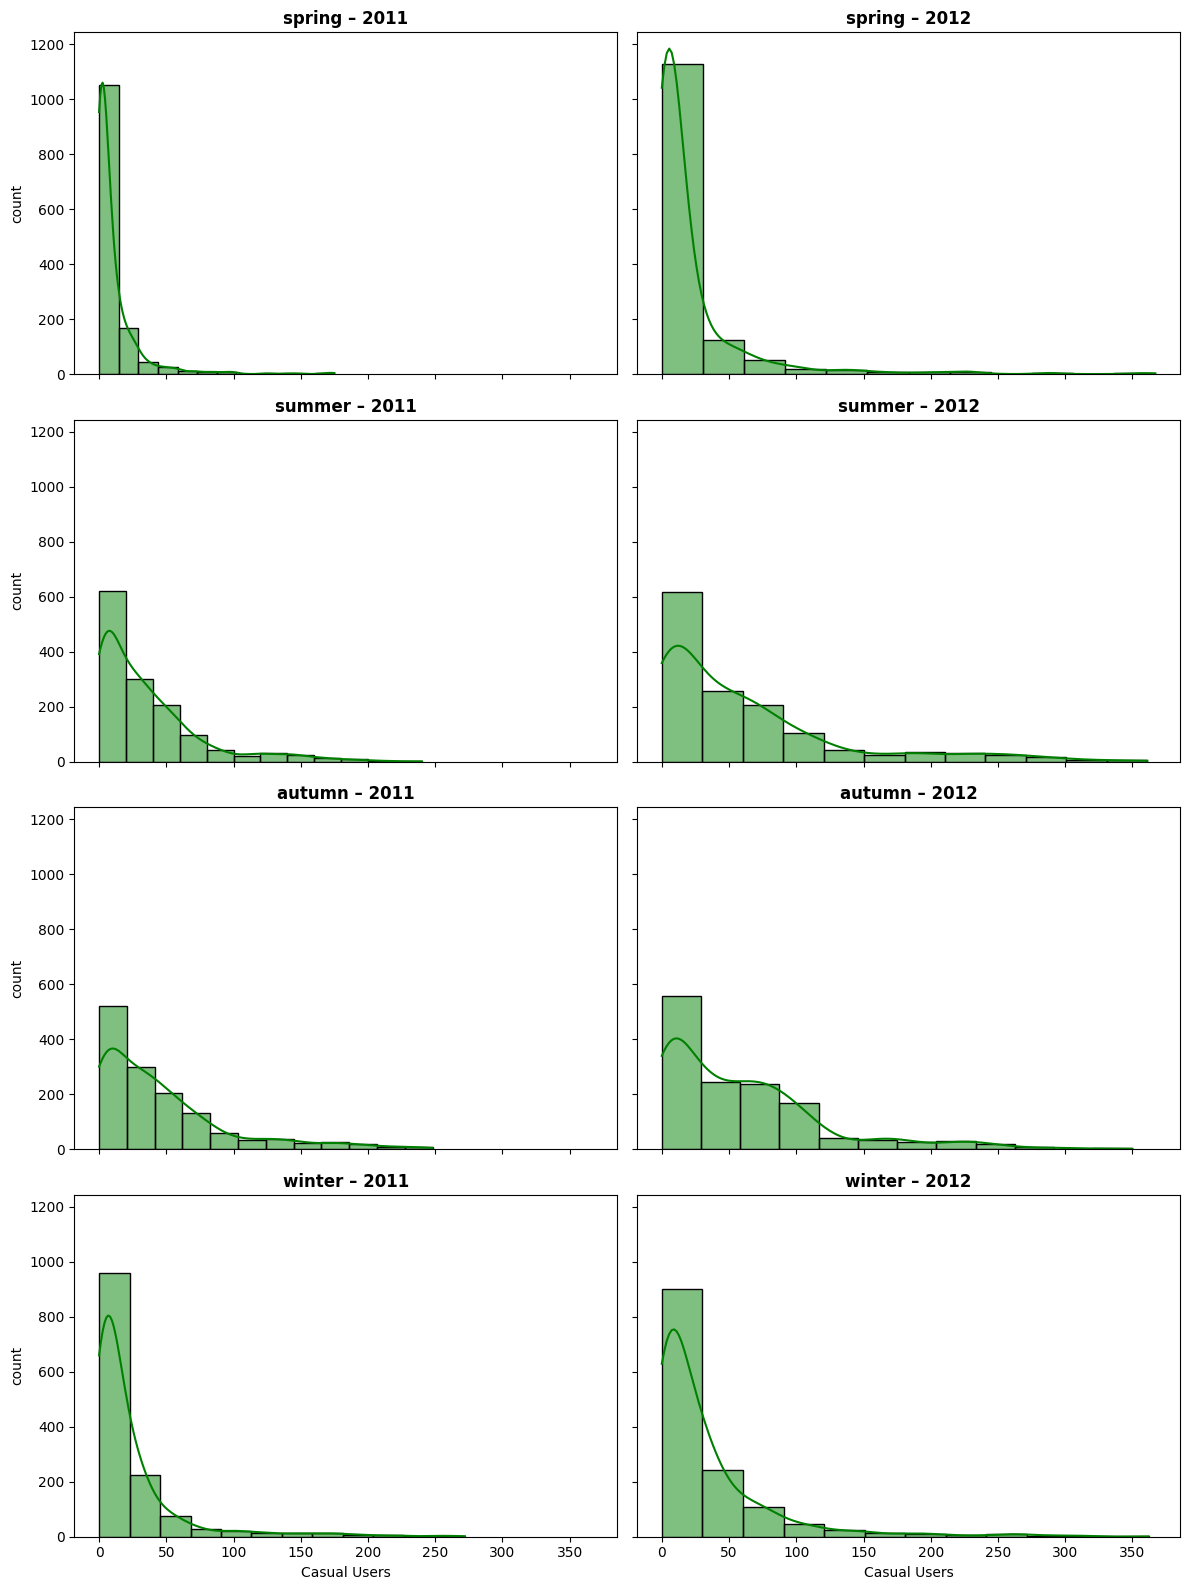

In [72]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='casual',
            bins=12,
            kde=True,
            color='green',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Casual Users")
        ax.set_ylabel("count")
        
print('Casual users')
plt.tight_layout()
plt.show()




REGISTERED USERS


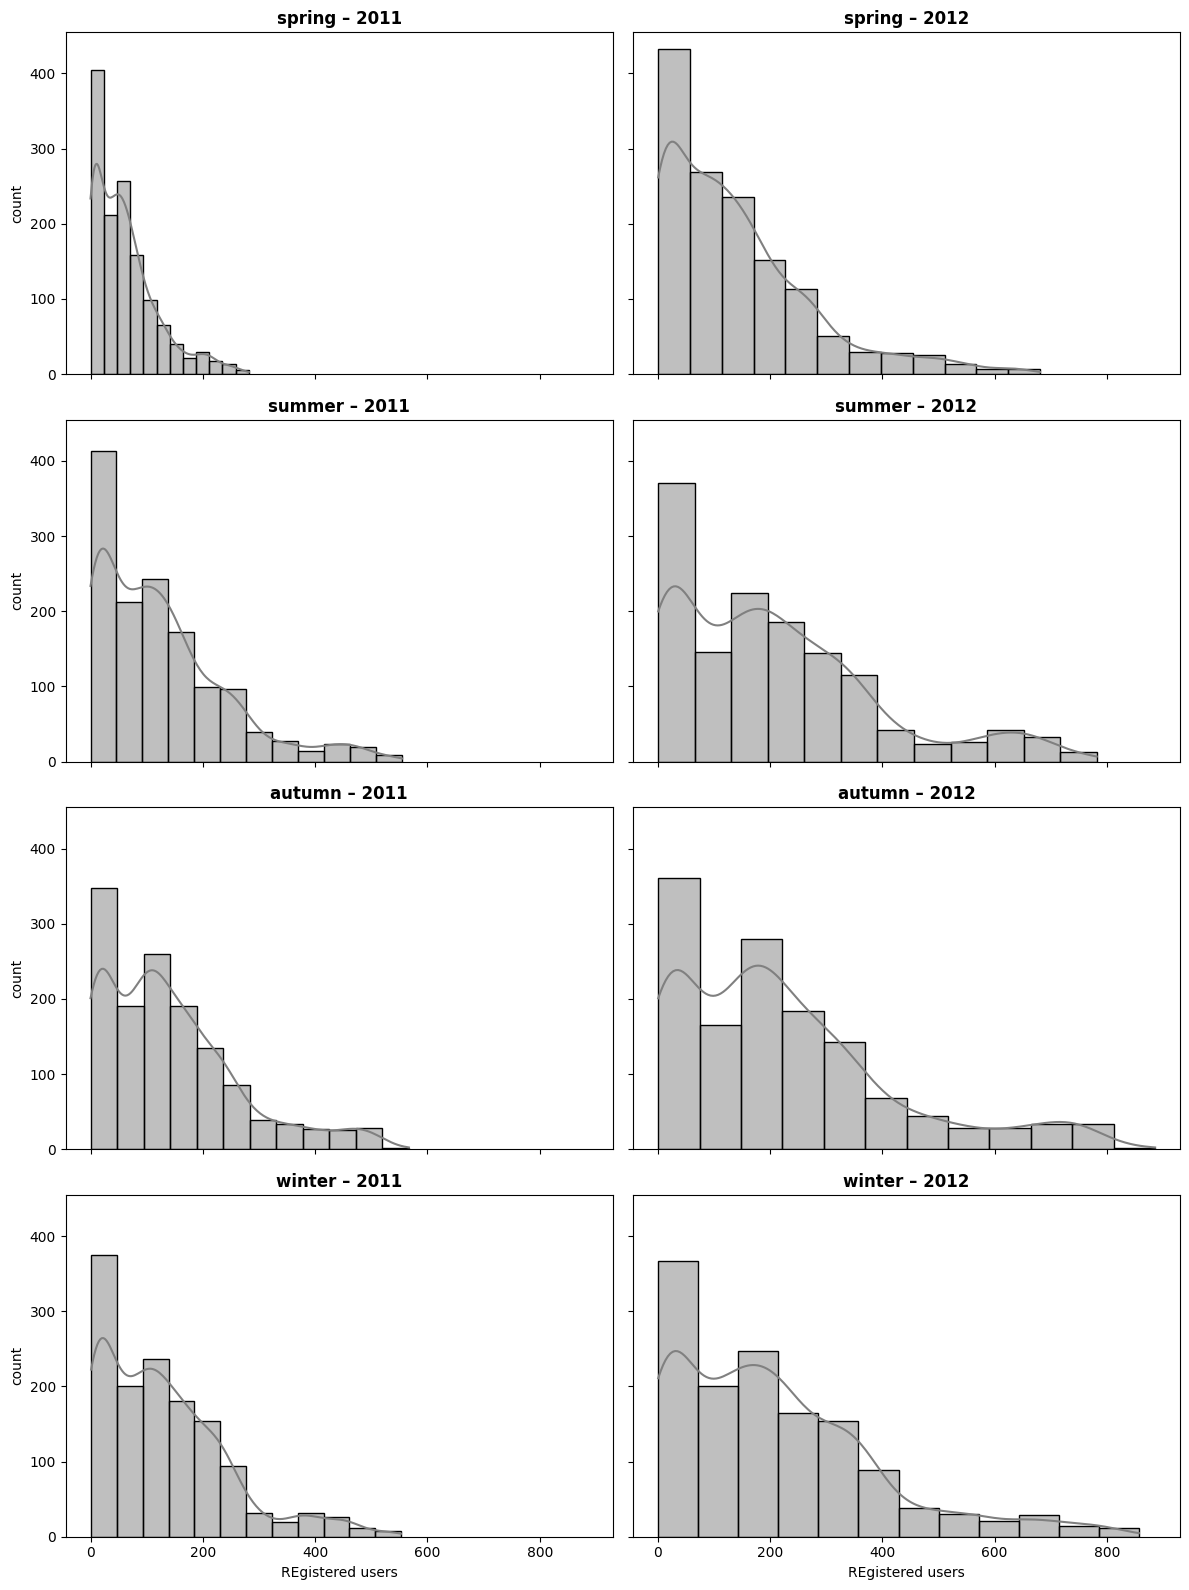

In [73]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='registered',
            bins=12,
            kde=True,
            color='gray',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("REgistered users")
        ax.set_ylabel("count")
        
print('REGISTERED USERS')
plt.tight_layout()
plt.show()


Temperature Sensation


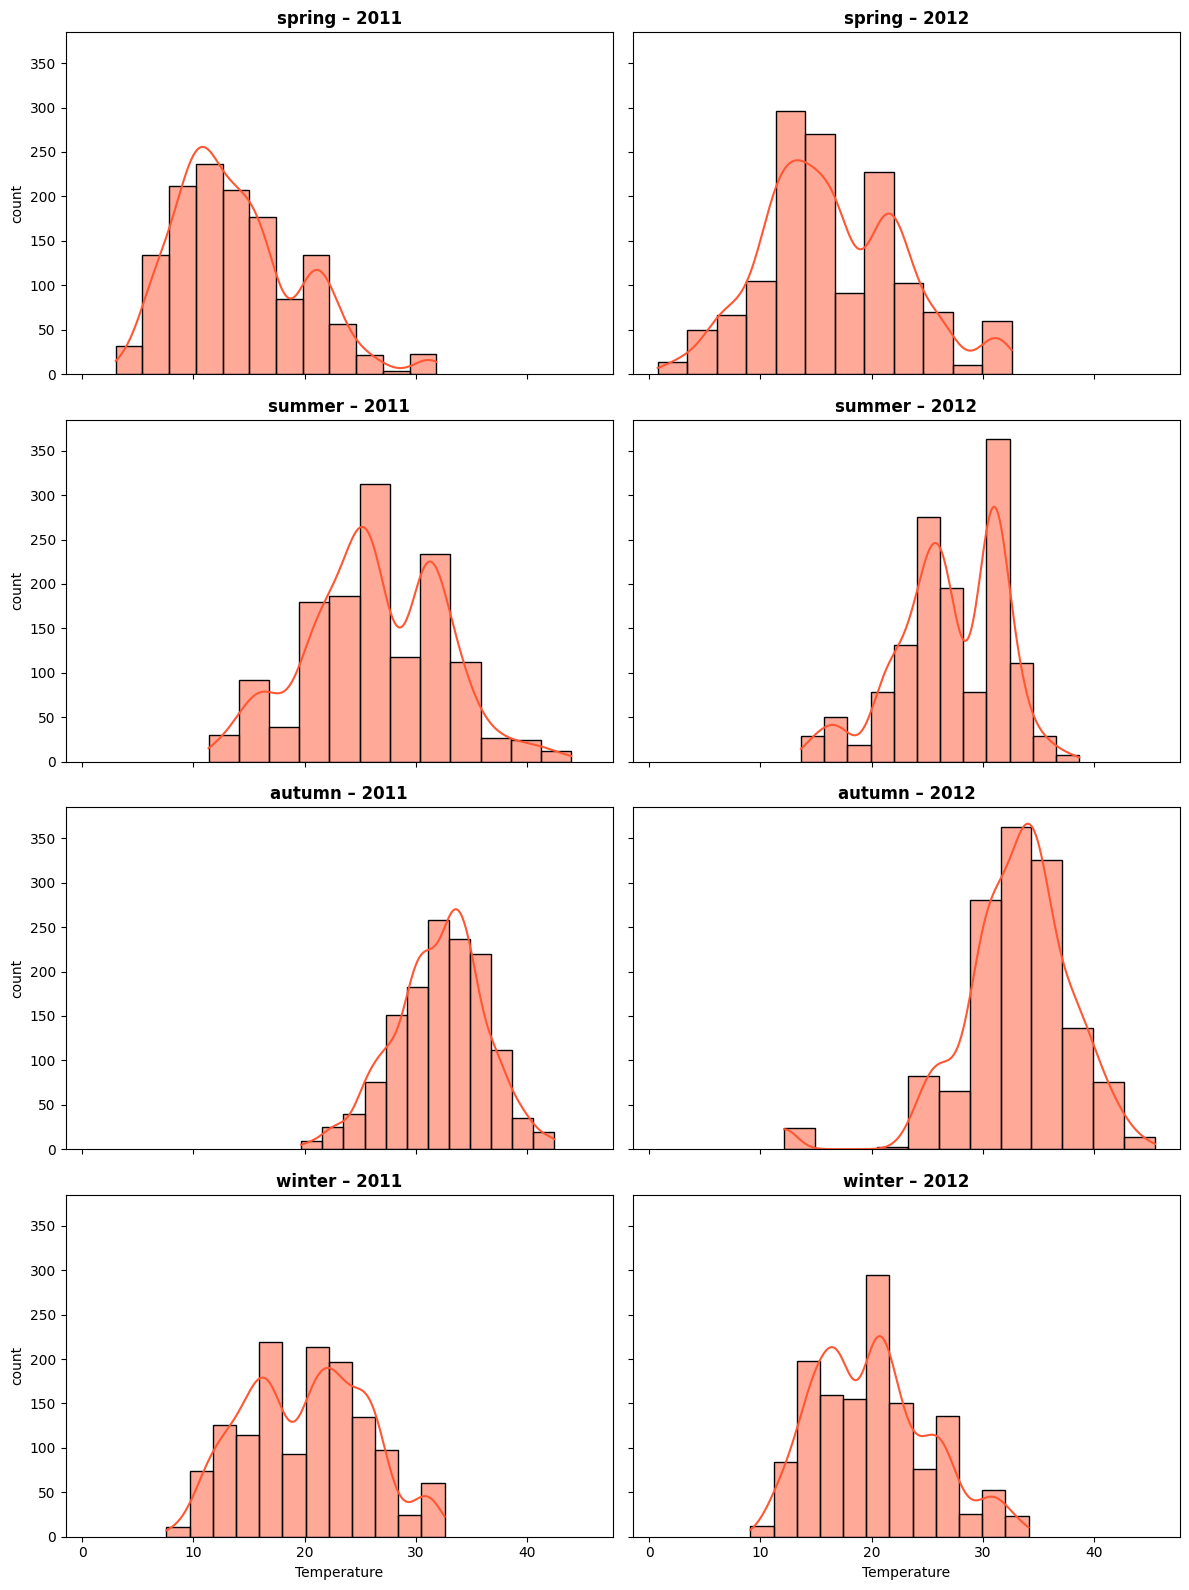

In [77]:


years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.histplot(
            data=df_sub,
            x='atemp',
            bins=12,
            kde=True,
            color='#FF5733',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Temperature")
        ax.set_ylabel("count")
        
print('Temperature Sensation')
plt.tight_layout()
plt.show()


### 2. Plot the distributions of all the numerical columns in the dataset using box plots.

TEMPERATURE


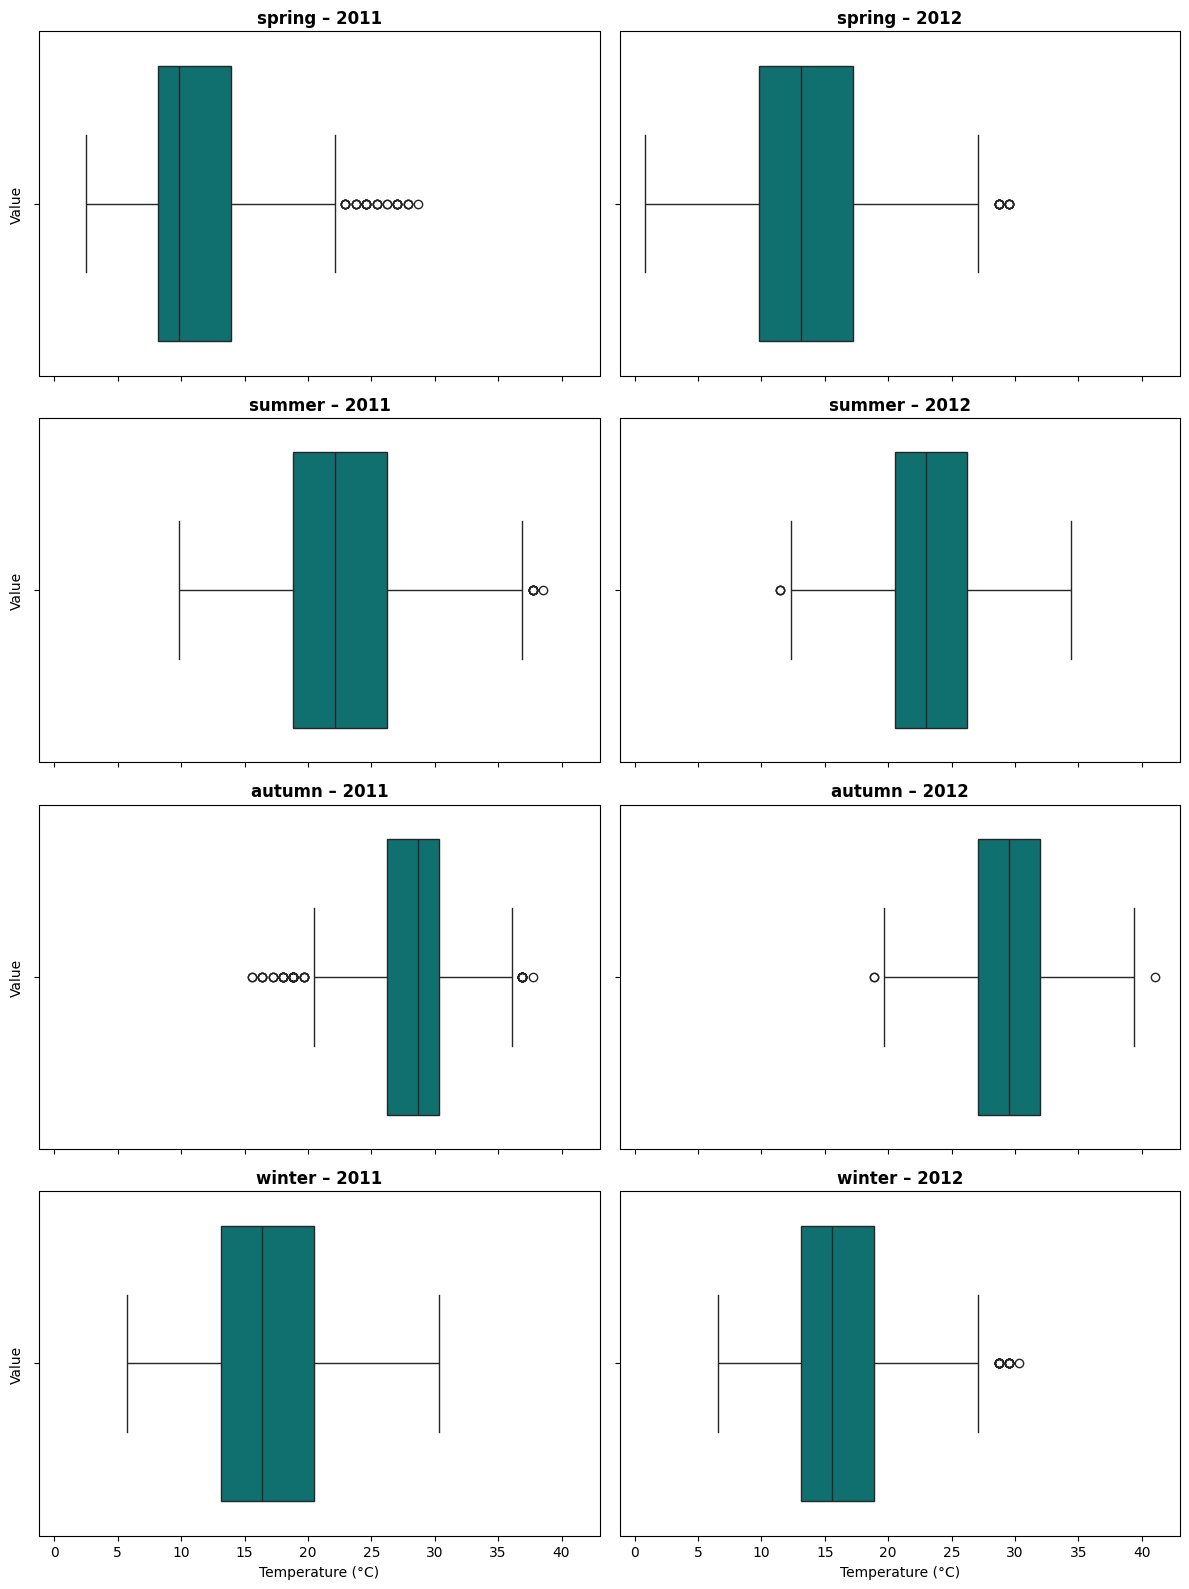

In [79]:
seasons = ["spring", "summer", "autumn", "winter"]
years = [2011, 2012]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='temp',
            color='teal',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Temperature (°C)")
        ax.set_ylabel("Value")

print('TEMPERATURE')
plt.tight_layout()
plt.show()

Temperature Sensation


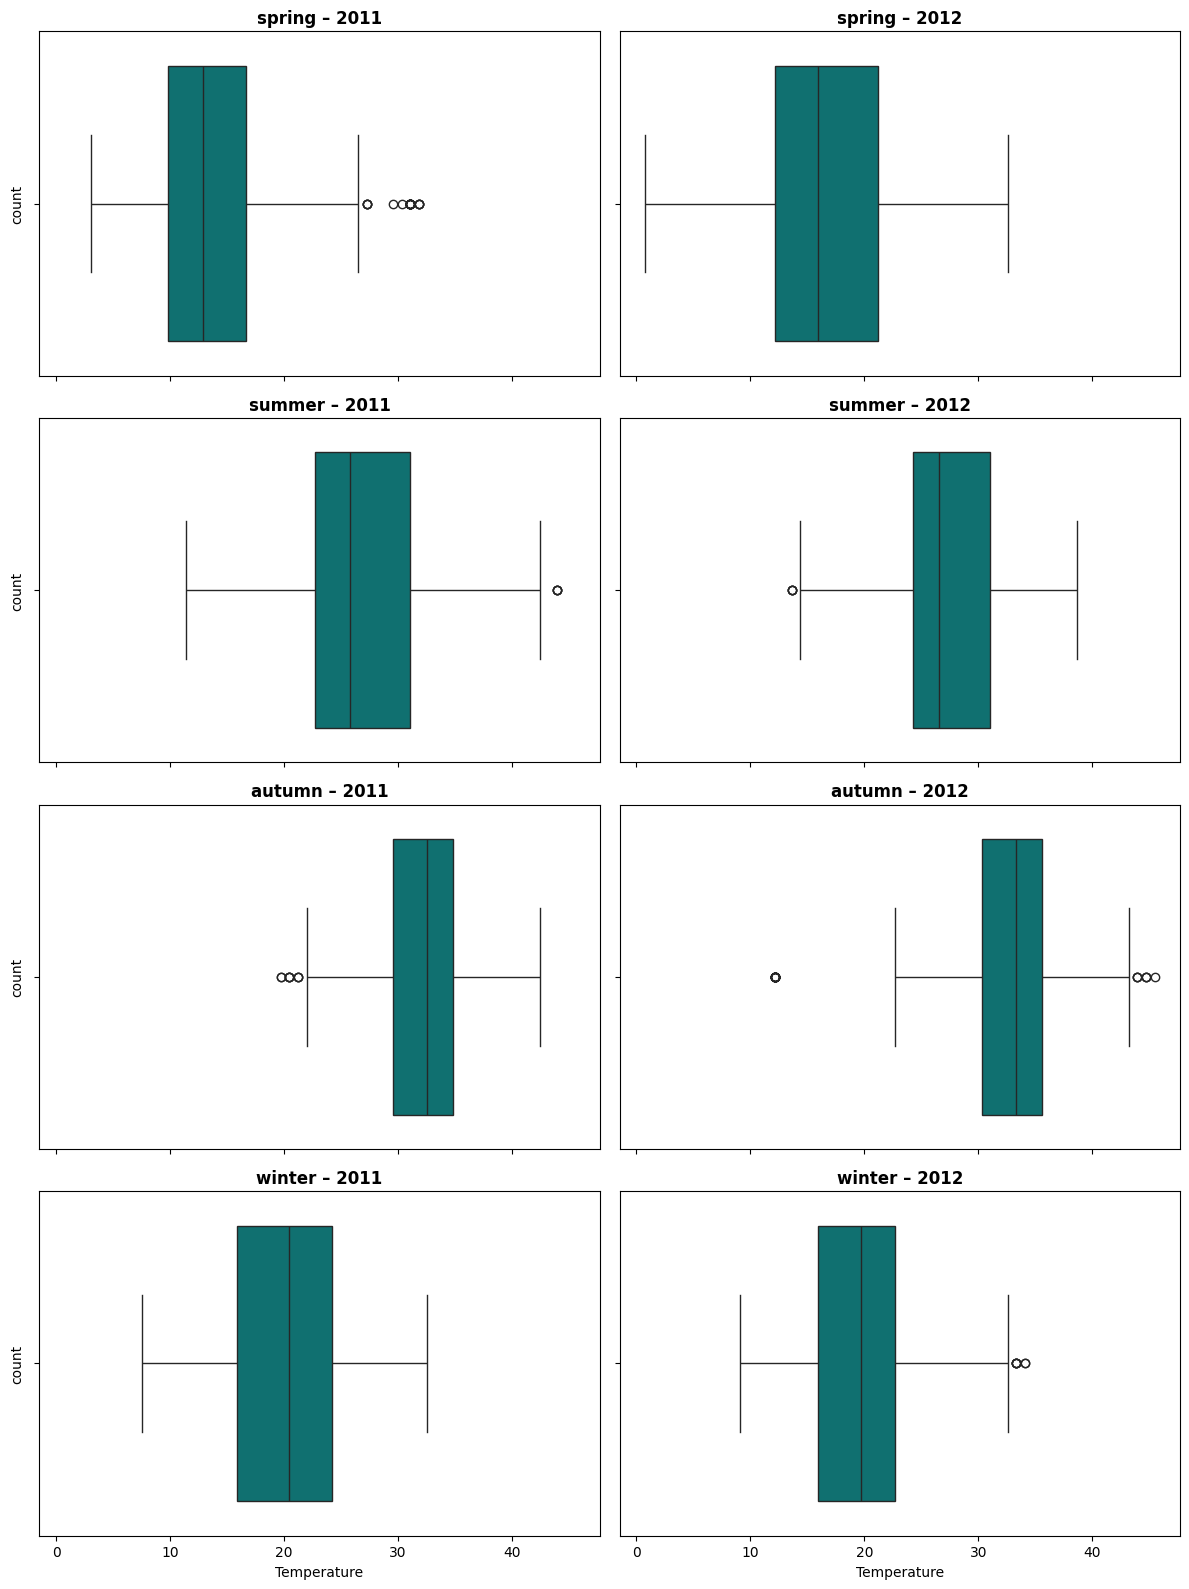

In [82]:


years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='atemp',
            color='teal',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Temperature")
        ax.set_ylabel("count")
        
print('Temperature Sensation')
plt.tight_layout()
plt.show()


Humidity


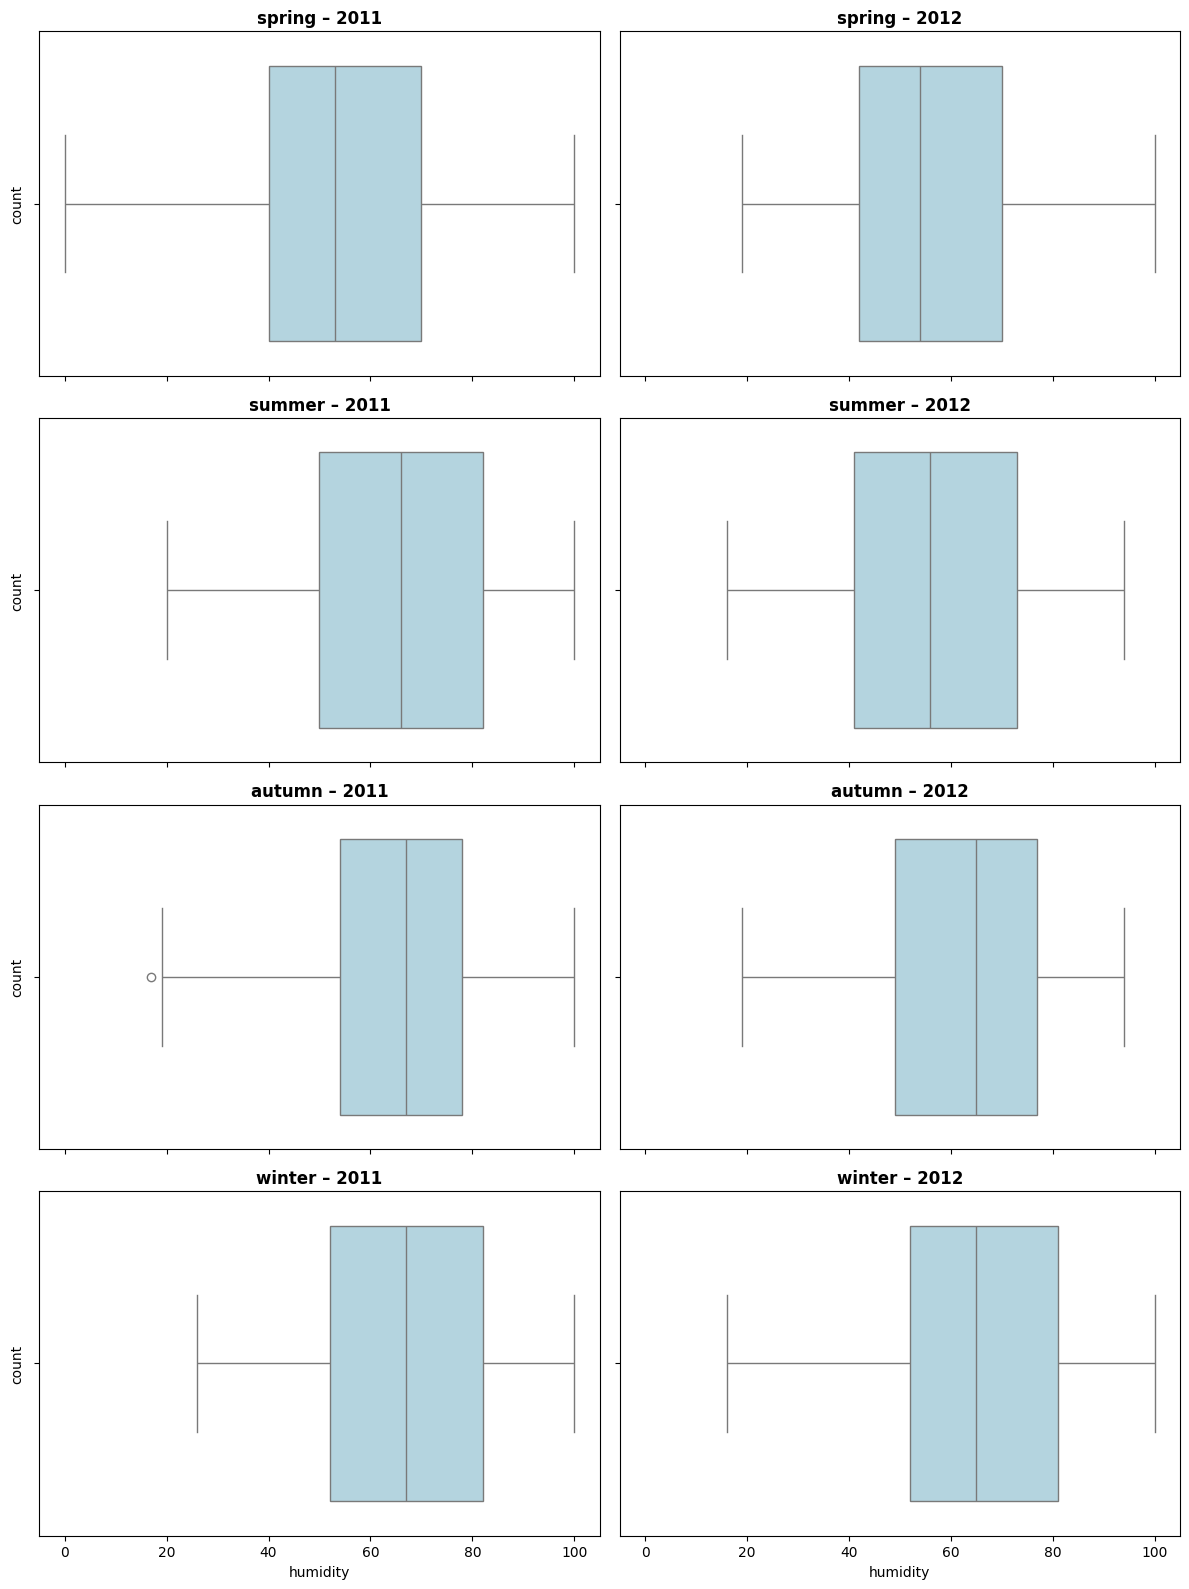

In [85]:




years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='humidity',
            color='lightblue',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("humidity")
        ax.set_ylabel("count")
print('Humidity')
plt.tight_layout()
plt.show()


WIND SPEED


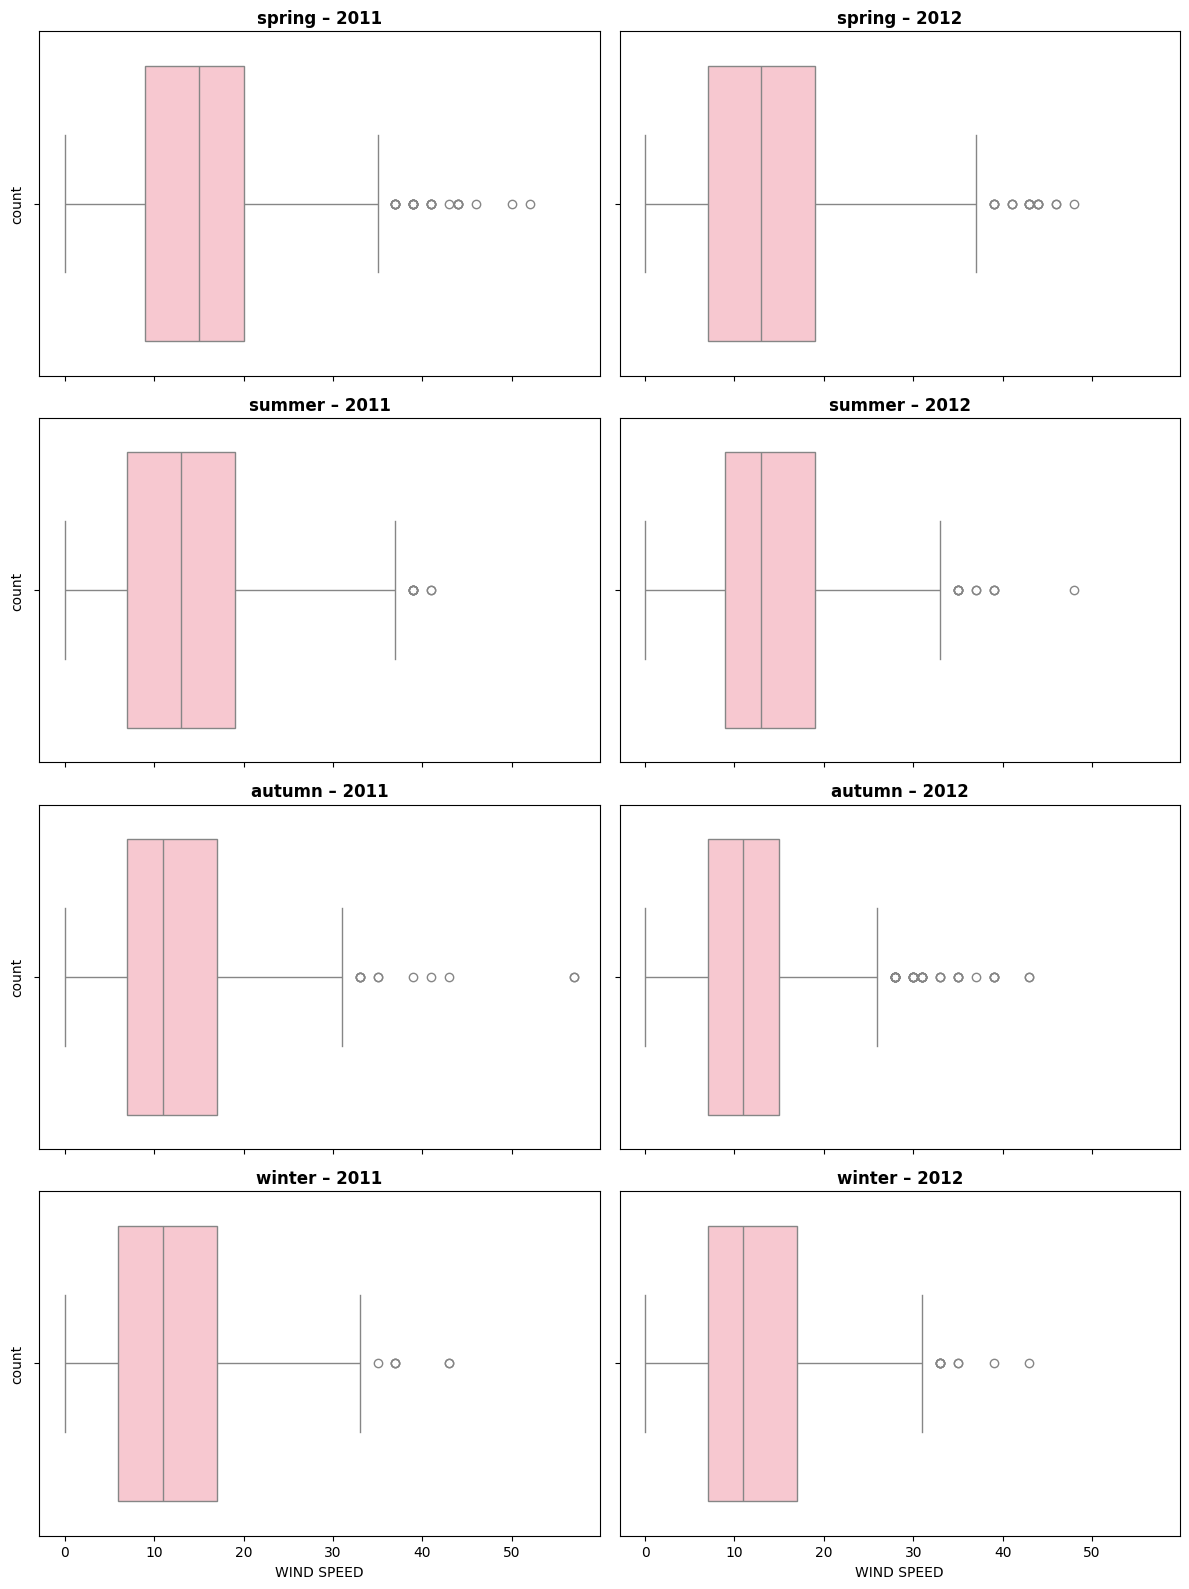

In [86]:



years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='windspeed',
            
            color='pink',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("WIND SPEED")
        ax.set_ylabel("count")
        
print('WIND SPEED')
plt.tight_layout()
plt.show()


Casual users


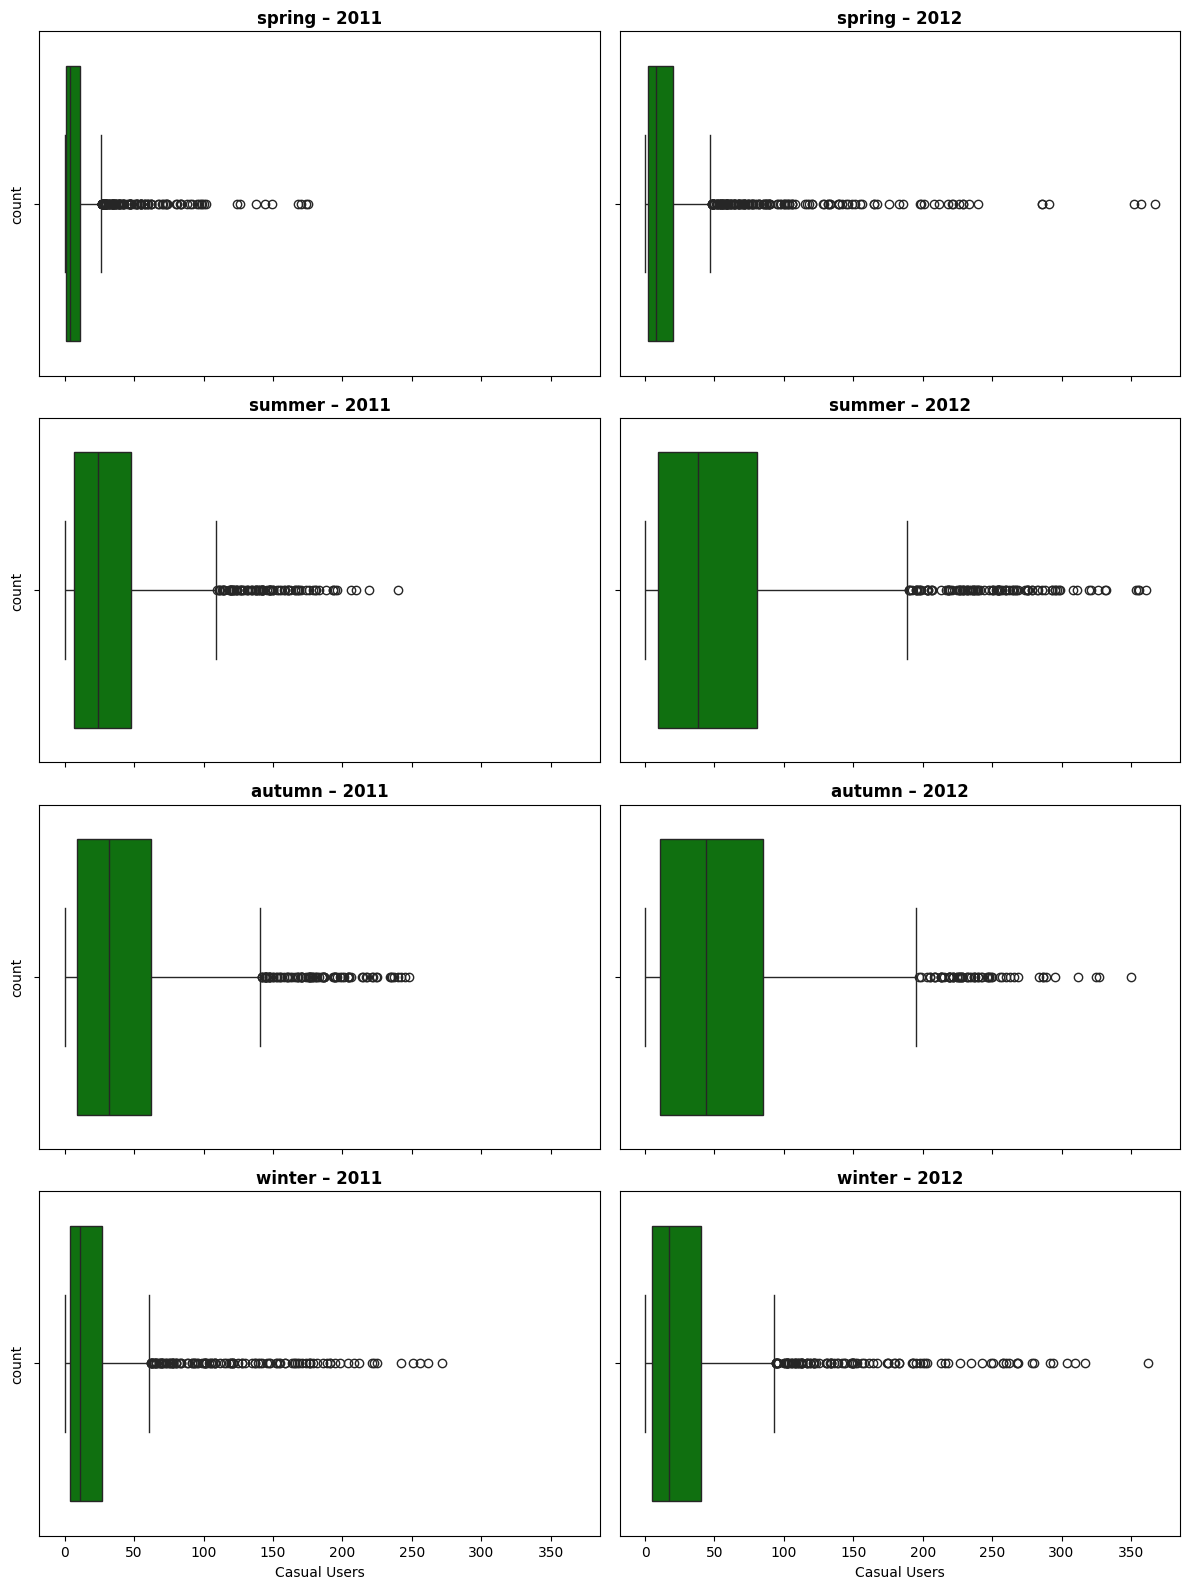

In [87]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='casual',
            color='green',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Casual Users")
        ax.set_ylabel("count")
        
print('Casual users')
plt.tight_layout()
plt.show()




REGISTERED USERS


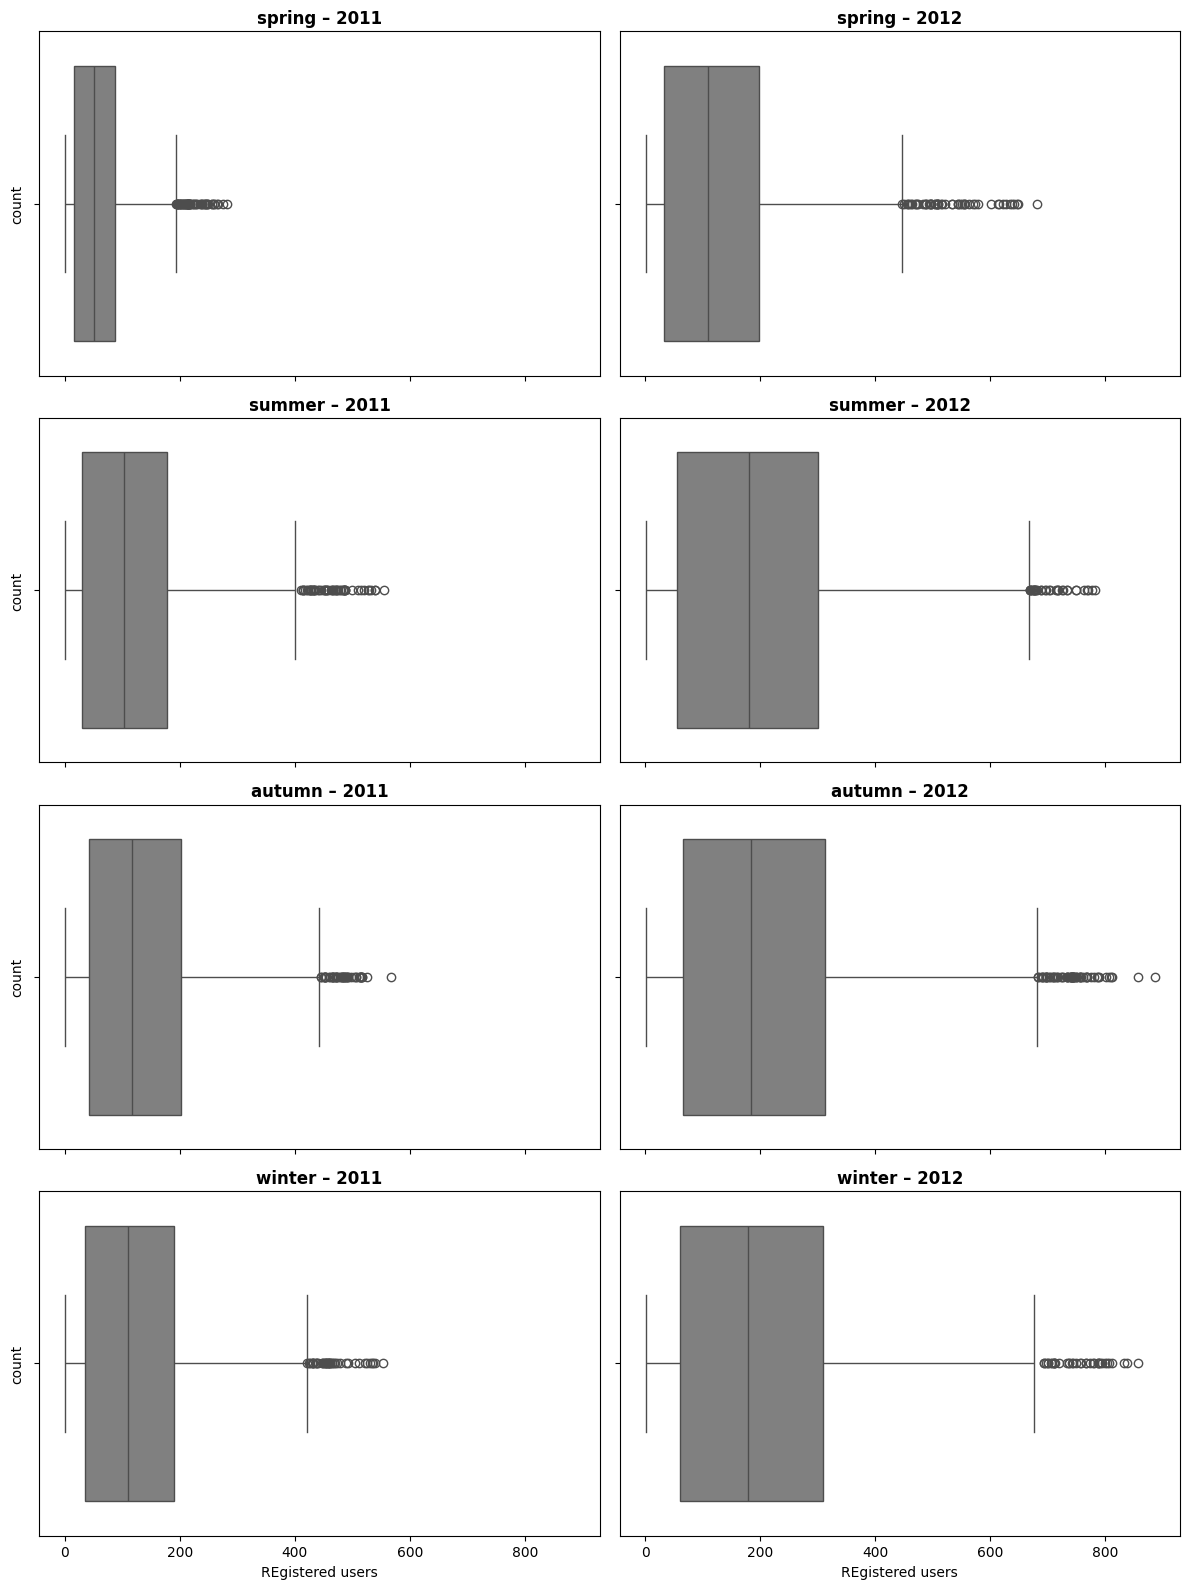

In [88]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='registered',
            color='gray',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("REgistered users")
        ax.set_ylabel("count")
        
print('REGISTERED USERS')
plt.tight_layout()
plt.show()


TOTAL USERS


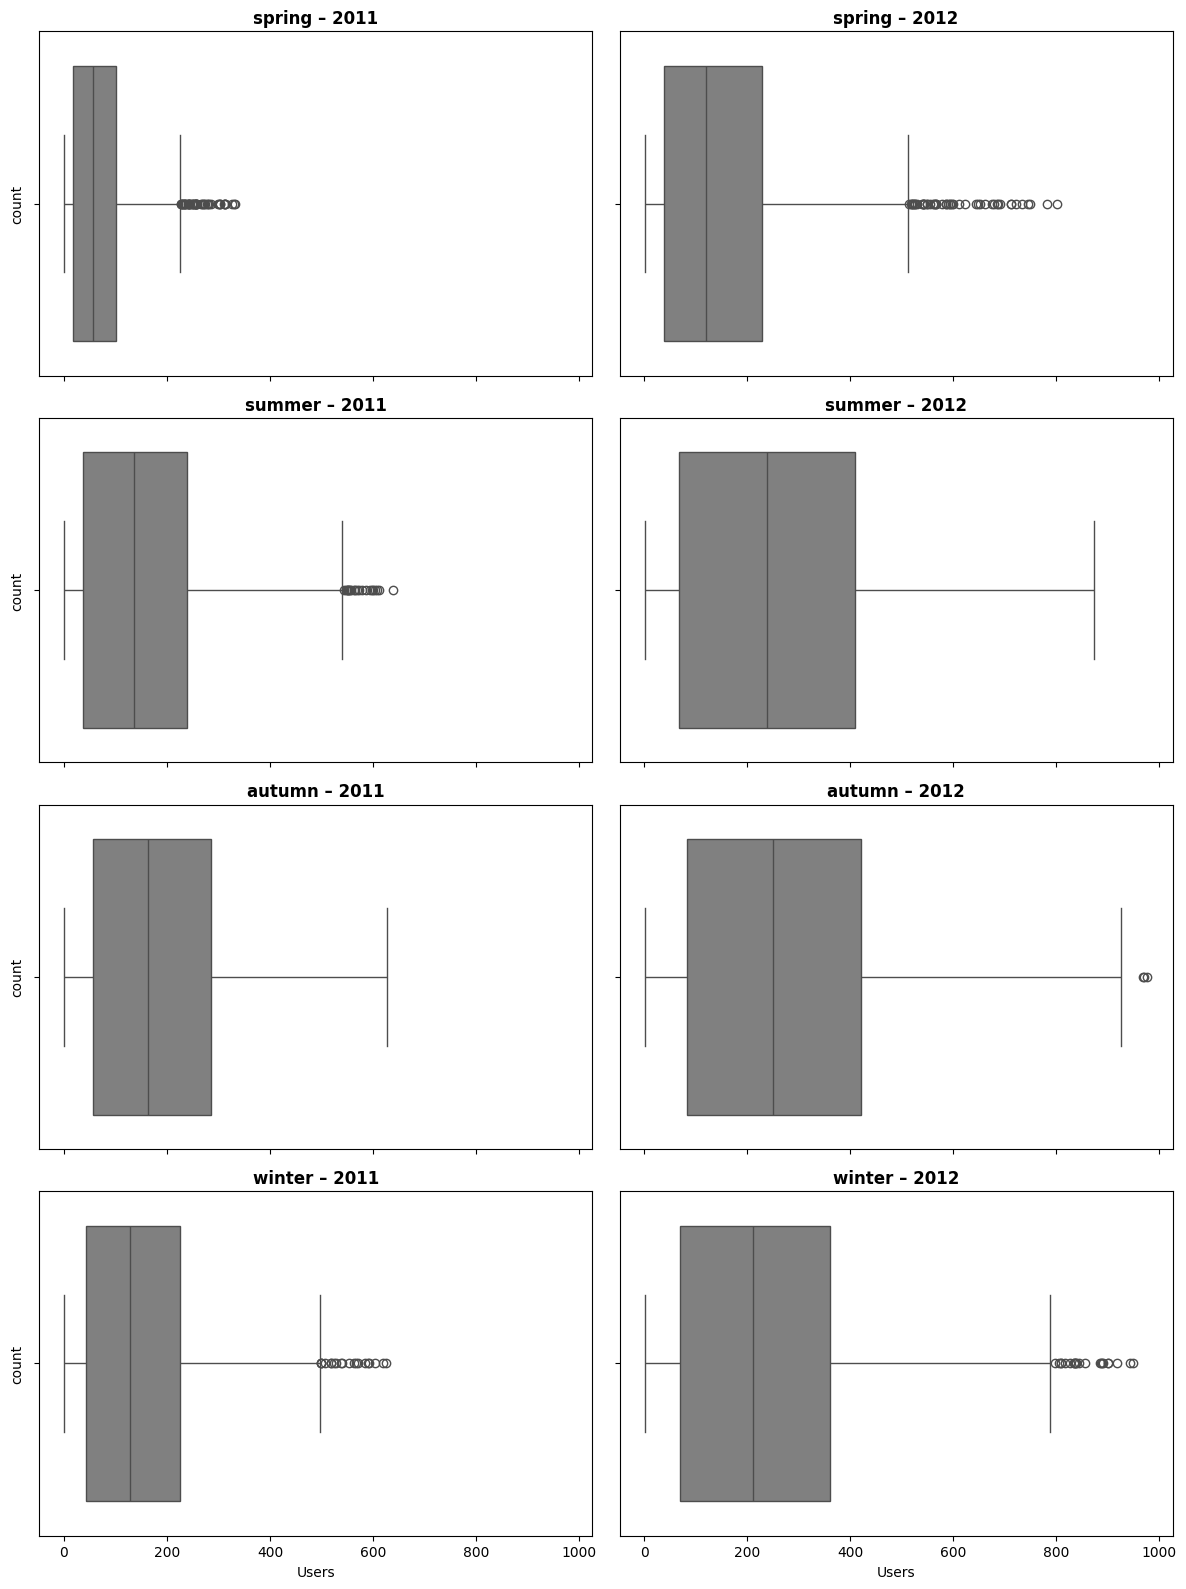

In [89]:

years = [2011, 2012]
seasons = ["spring", "summer", "autumn", "winter"]

fig, axes = plt.subplots(
    nrows=len(seasons),
    ncols=len(years),
    figsize=(12, 16),
    sharex=True,
    sharey=True
)

for i, season in enumerate(seasons):
    for j, year in enumerate(years):
        ax = axes[i, j]
        df_sub = df[(df['season'] == season) & (df['year'] == year)]

        sns.boxplot(
            data=df_sub,
            x='count',
            color='gray',
            ax=ax
        )

        ax.set_title(f"{season} – {year}", fontweight='bold')
        ax.set_xlabel("Users")
        ax.set_ylabel("count")
print('TOTAL USERS')
plt.tight_layout()
plt.show()


### 3.Plot the the mean of the hourly total rentals count for working and non-working days.

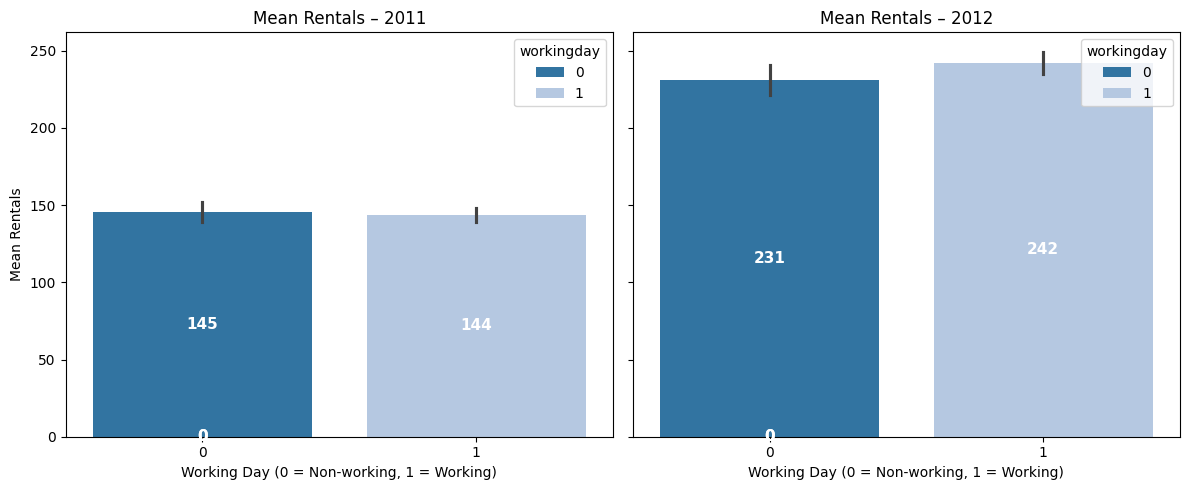

In [118]:
years = [2011, 2012]

fig, axes = plt.subplots(
    nrows=1,
    ncols=len(years),
    figsize=(12, 5),
    sharey=True
)

for j, year in enumerate(years):
    ax = axes[j]
    df_sub = df[df["year"] == year]

    sns.barplot(
        x="workingday",
        y="count",
        estimator=np.mean,
        palette="tab20",
        hue="workingday",
        data=df_sub,
        errorbar=('ci', 95),
        ax=ax
    )

    ax.set_title(f"Mean Rentals – {year}")
    ax.set_xlabel("Working Day (0 = Non-working, 1 = Working)")
    ax.set_ylabel("Mean Rentals")

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height/2,
            f"{height:.0f}",
            ha="center", va="center",
            color="white", fontsize=11, fontweight="bold"
        )

plt.tight_layout()
plt.show()


### 4. Plot the the mean of the hourly total rentals count for the different months for both years combined.

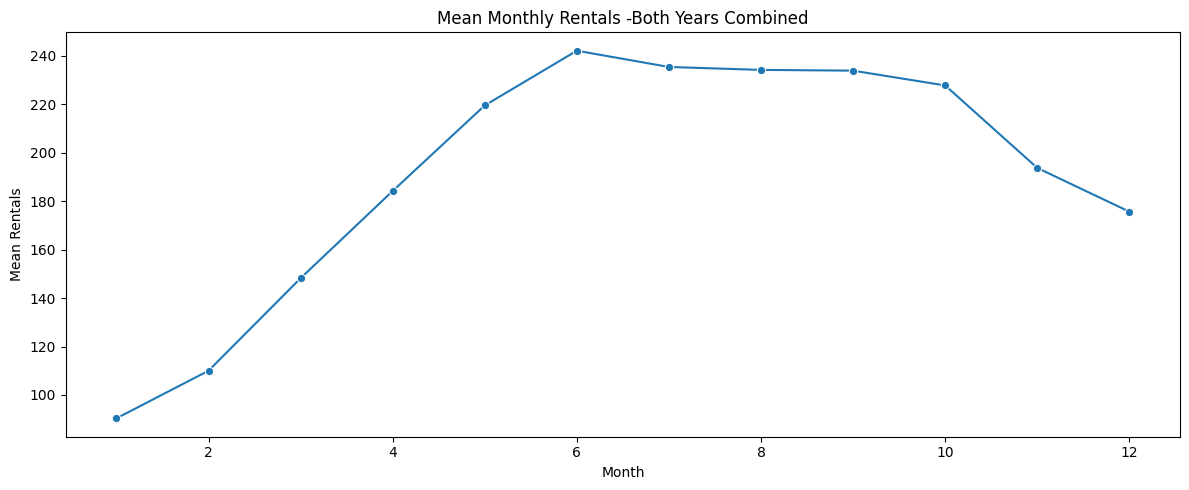

In [112]:
monthly_mean = (
    df.groupby(['month'])['count']
      .mean()
      .reset_index()
)

plt.figure(figsize=(12, 5))

sns.lineplot(
    data=monthly_mean,
    x='month',
    y='count',
    marker='o'
)

plt.title('Mean Monthly Rentals -Both Years Combined')
plt.xlabel('Month')
plt.ylabel('Mean Rentals')

plt.tight_layout()
plt.show()

### 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

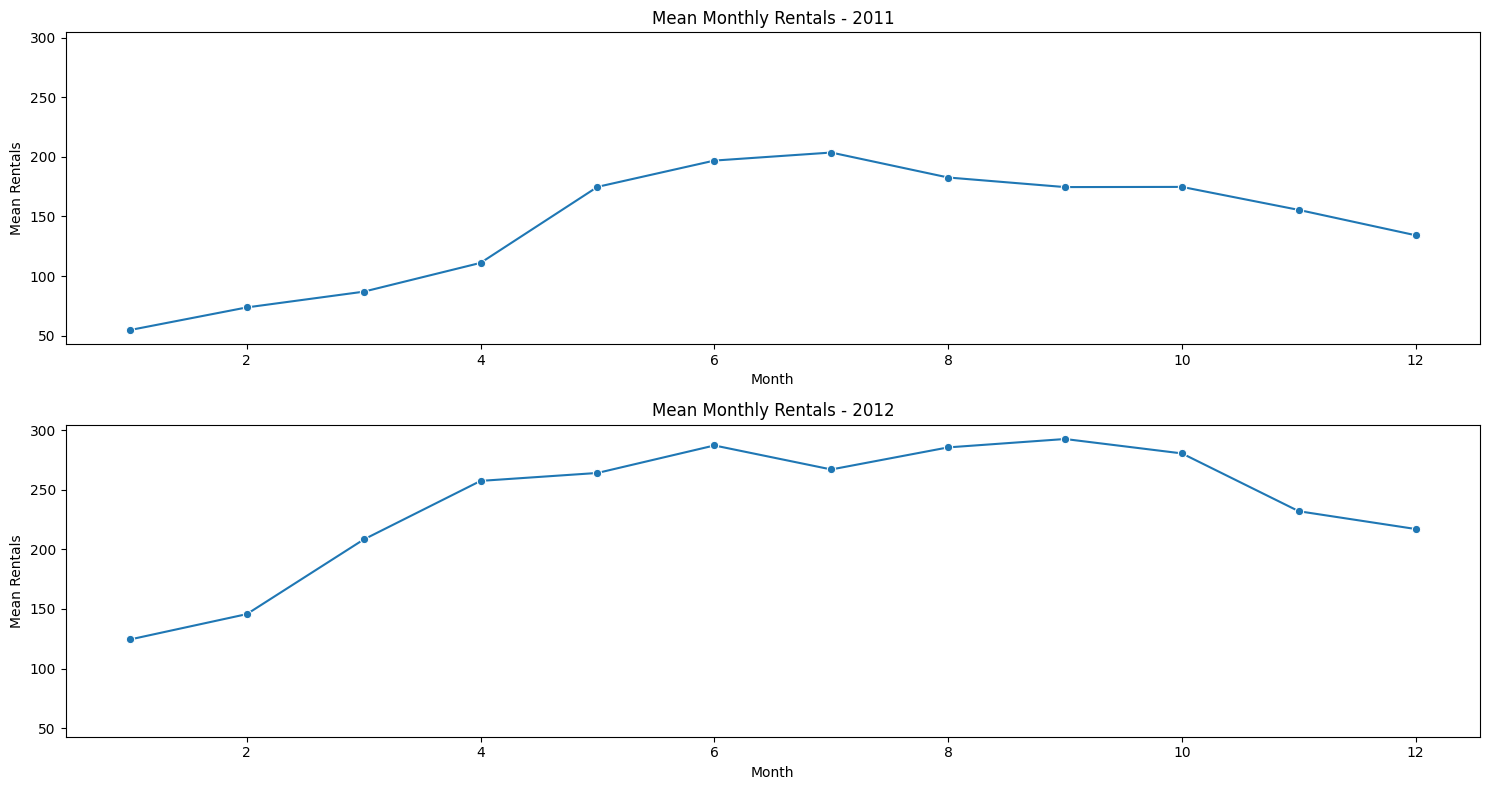

In [113]:
monthly_mean = (
    df.groupby(['year', 'month'])['count']
      .mean()
      .reset_index()
)

years = [2011, 2012]

fig, axes = plt.subplots(len(years), 1, figsize=(15, 4 * len(years)), sharey=True)

for ax, year in zip(axes, years):
    sns.lineplot(
        data=monthly_mean[monthly_mean["year"] == year],
        x='month',
        y='count',
        ax=ax,
        marker='o'
    )
    ax.set_title(f'Mean Monthly Rentals - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Mean Rentals')

plt.tight_layout()
plt.show()

### 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

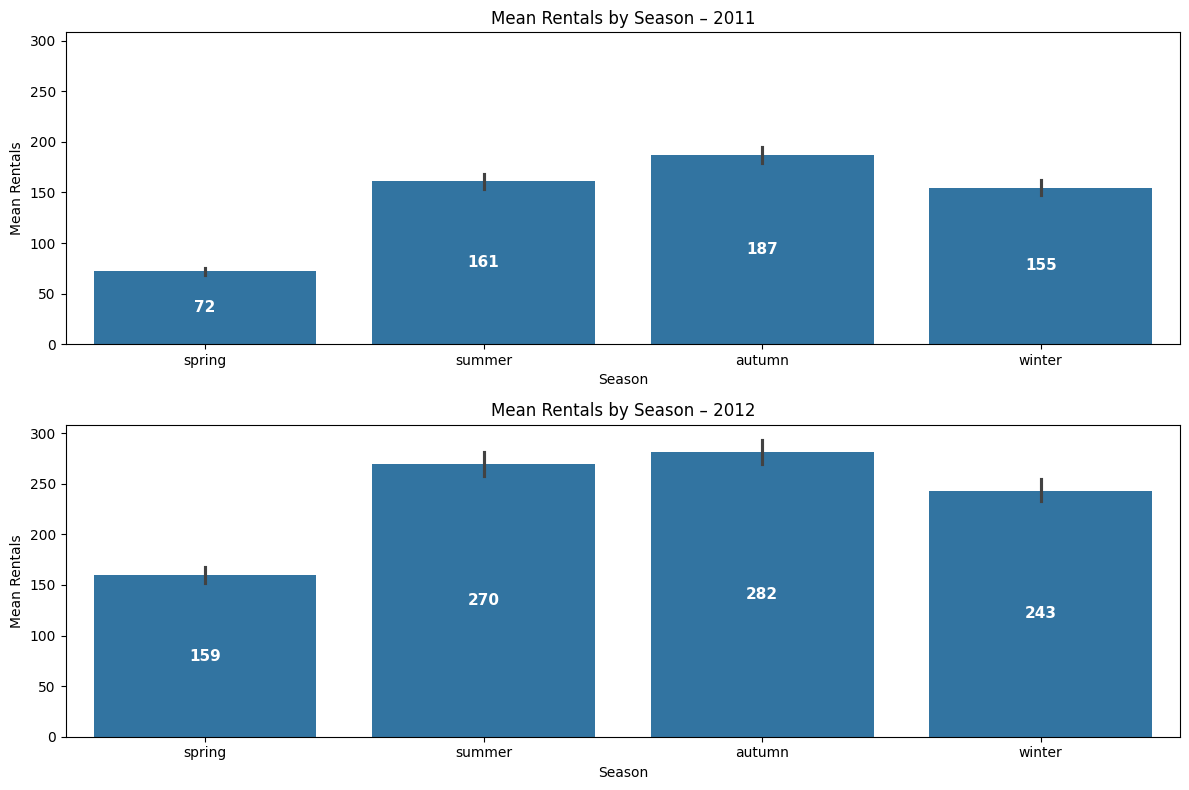

In [119]:
df['year'] = df['datetime'].dt.year

season_mean = (
    df.groupby(['year', 'season'])['count']
      .mean()
      .reset_index()
)

years = season_mean['year'].unique()

fig, axes = plt.subplots(
    nrows=len(years),
    ncols=1,
    figsize=(12, 4 * len(years)),
    sharey=True
)

if len(years) == 1:
    axes = [axes]

for ax, year in zip(axes, years):
    data = df[df['year'] == year]  

    sns.barplot(
        data=data,
        x='season',
        y='count',
        ax=ax,
        estimator=np.mean,
        errorbar=('ci', 95) 
    )

    ax.set_title(f'Mean Rentals by Season – {year}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Mean Rentals')

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height/2,
            f"{height:.0f}",
            ha="center", va="center",
            color="white", fontsize=11, fontweight="bold"
        )

plt.tight_layout()
plt.show()

In autumn the mean is highest in both years. We can see also that 2012 is the highest year.

### 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

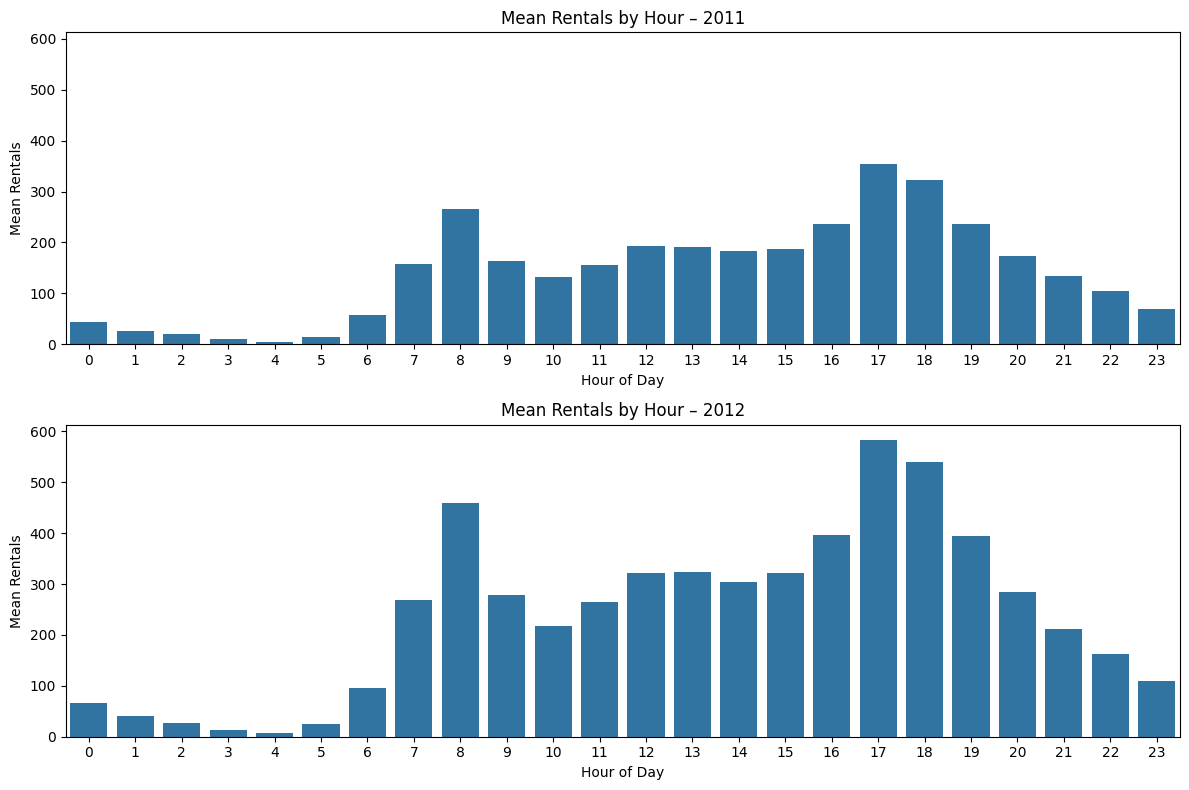

In [164]:
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour

hour_mean = (
    df.groupby(['year', 'hour'], observed=True)['count']
      .mean()
      .reset_index()
)

years = [2011,2012]

fig, axes = plt.subplots(
    nrows=len(years),
    ncols=1,
    figsize=(12, 4 * len(years)),
    sharey=True
)


for ax, year in zip(axes, years):
    data = hour_mean[hour_mean['year'] == year]

    sns.barplot(
        data=data,
        x='hour',
        y='count',
        ax=ax
    )

    ax.set_title(f'Mean Rentals by Hour – {year}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Mean Rentals')
    ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

As we expected, the afternoon is the highest period of time when the people rent at 17:00.

### 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

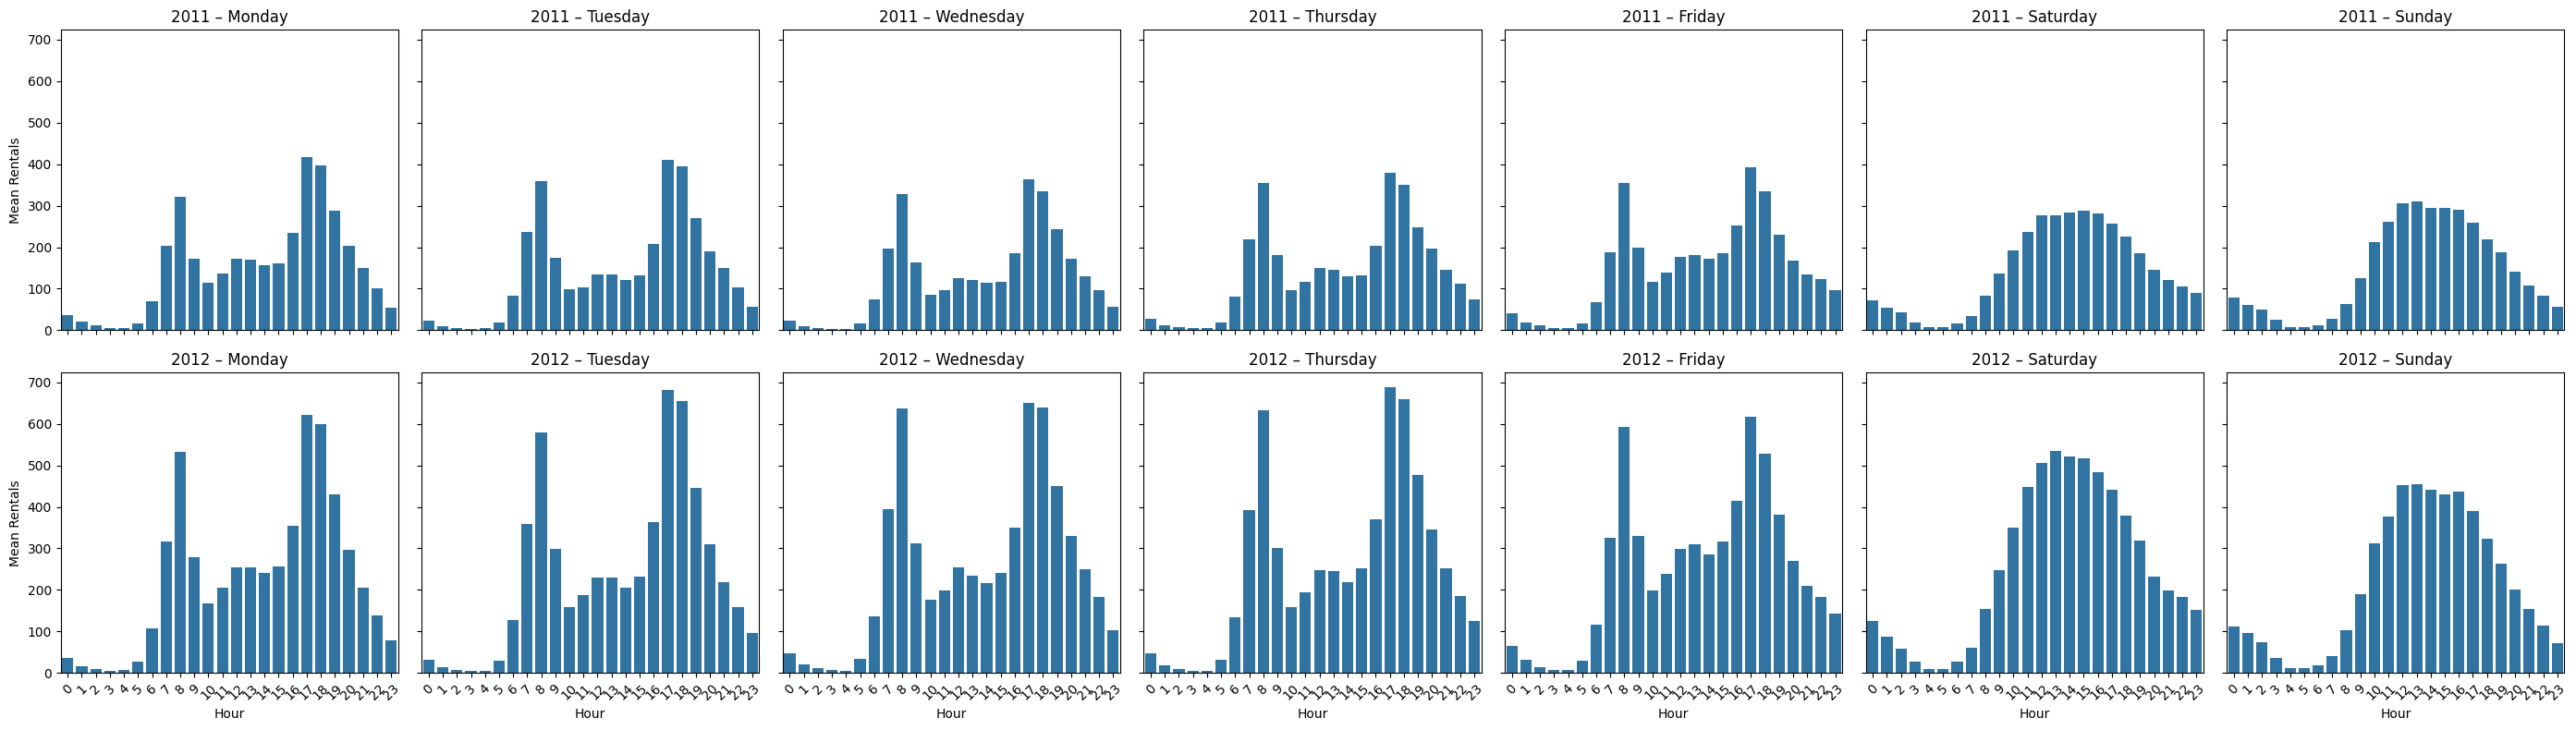

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

hour_dow_mean = (
    df.groupby(['year', 'day_of_week', 'hour'], observed=True)['count']
      .mean()
      .reset_index()
)

years = [2011, 2012]

weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

fig, axes = plt.subplots(
    nrows=len(years),
    ncols=len(weekday_order),
    figsize=(4 * len(weekday_order), 4 * len(years)),
    sharey=True,
    sharex=True
)

for i, year in enumerate(years):
    for j, weekday in enumerate(weekday_order):
        ax = axes[i][j]

        data = hour_dow_mean[
            (hour_dow_mean['year'] == year) &
            (hour_dow_mean['day_of_week'] == weekday)
        ]

        sns.barplot(
            data=data,
            x='hour',
            y='count',
            ax=ax
        )

        ax.set_title(f'{year} – {weekday}')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Mean Rentals' if j == 0 else '')
        ax.set_xticks(range(0, 24))
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We can see the Saturday afternoons are the highest rents, the worst in sunday evening and also in the morning. The night doesnt have too much users

### 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

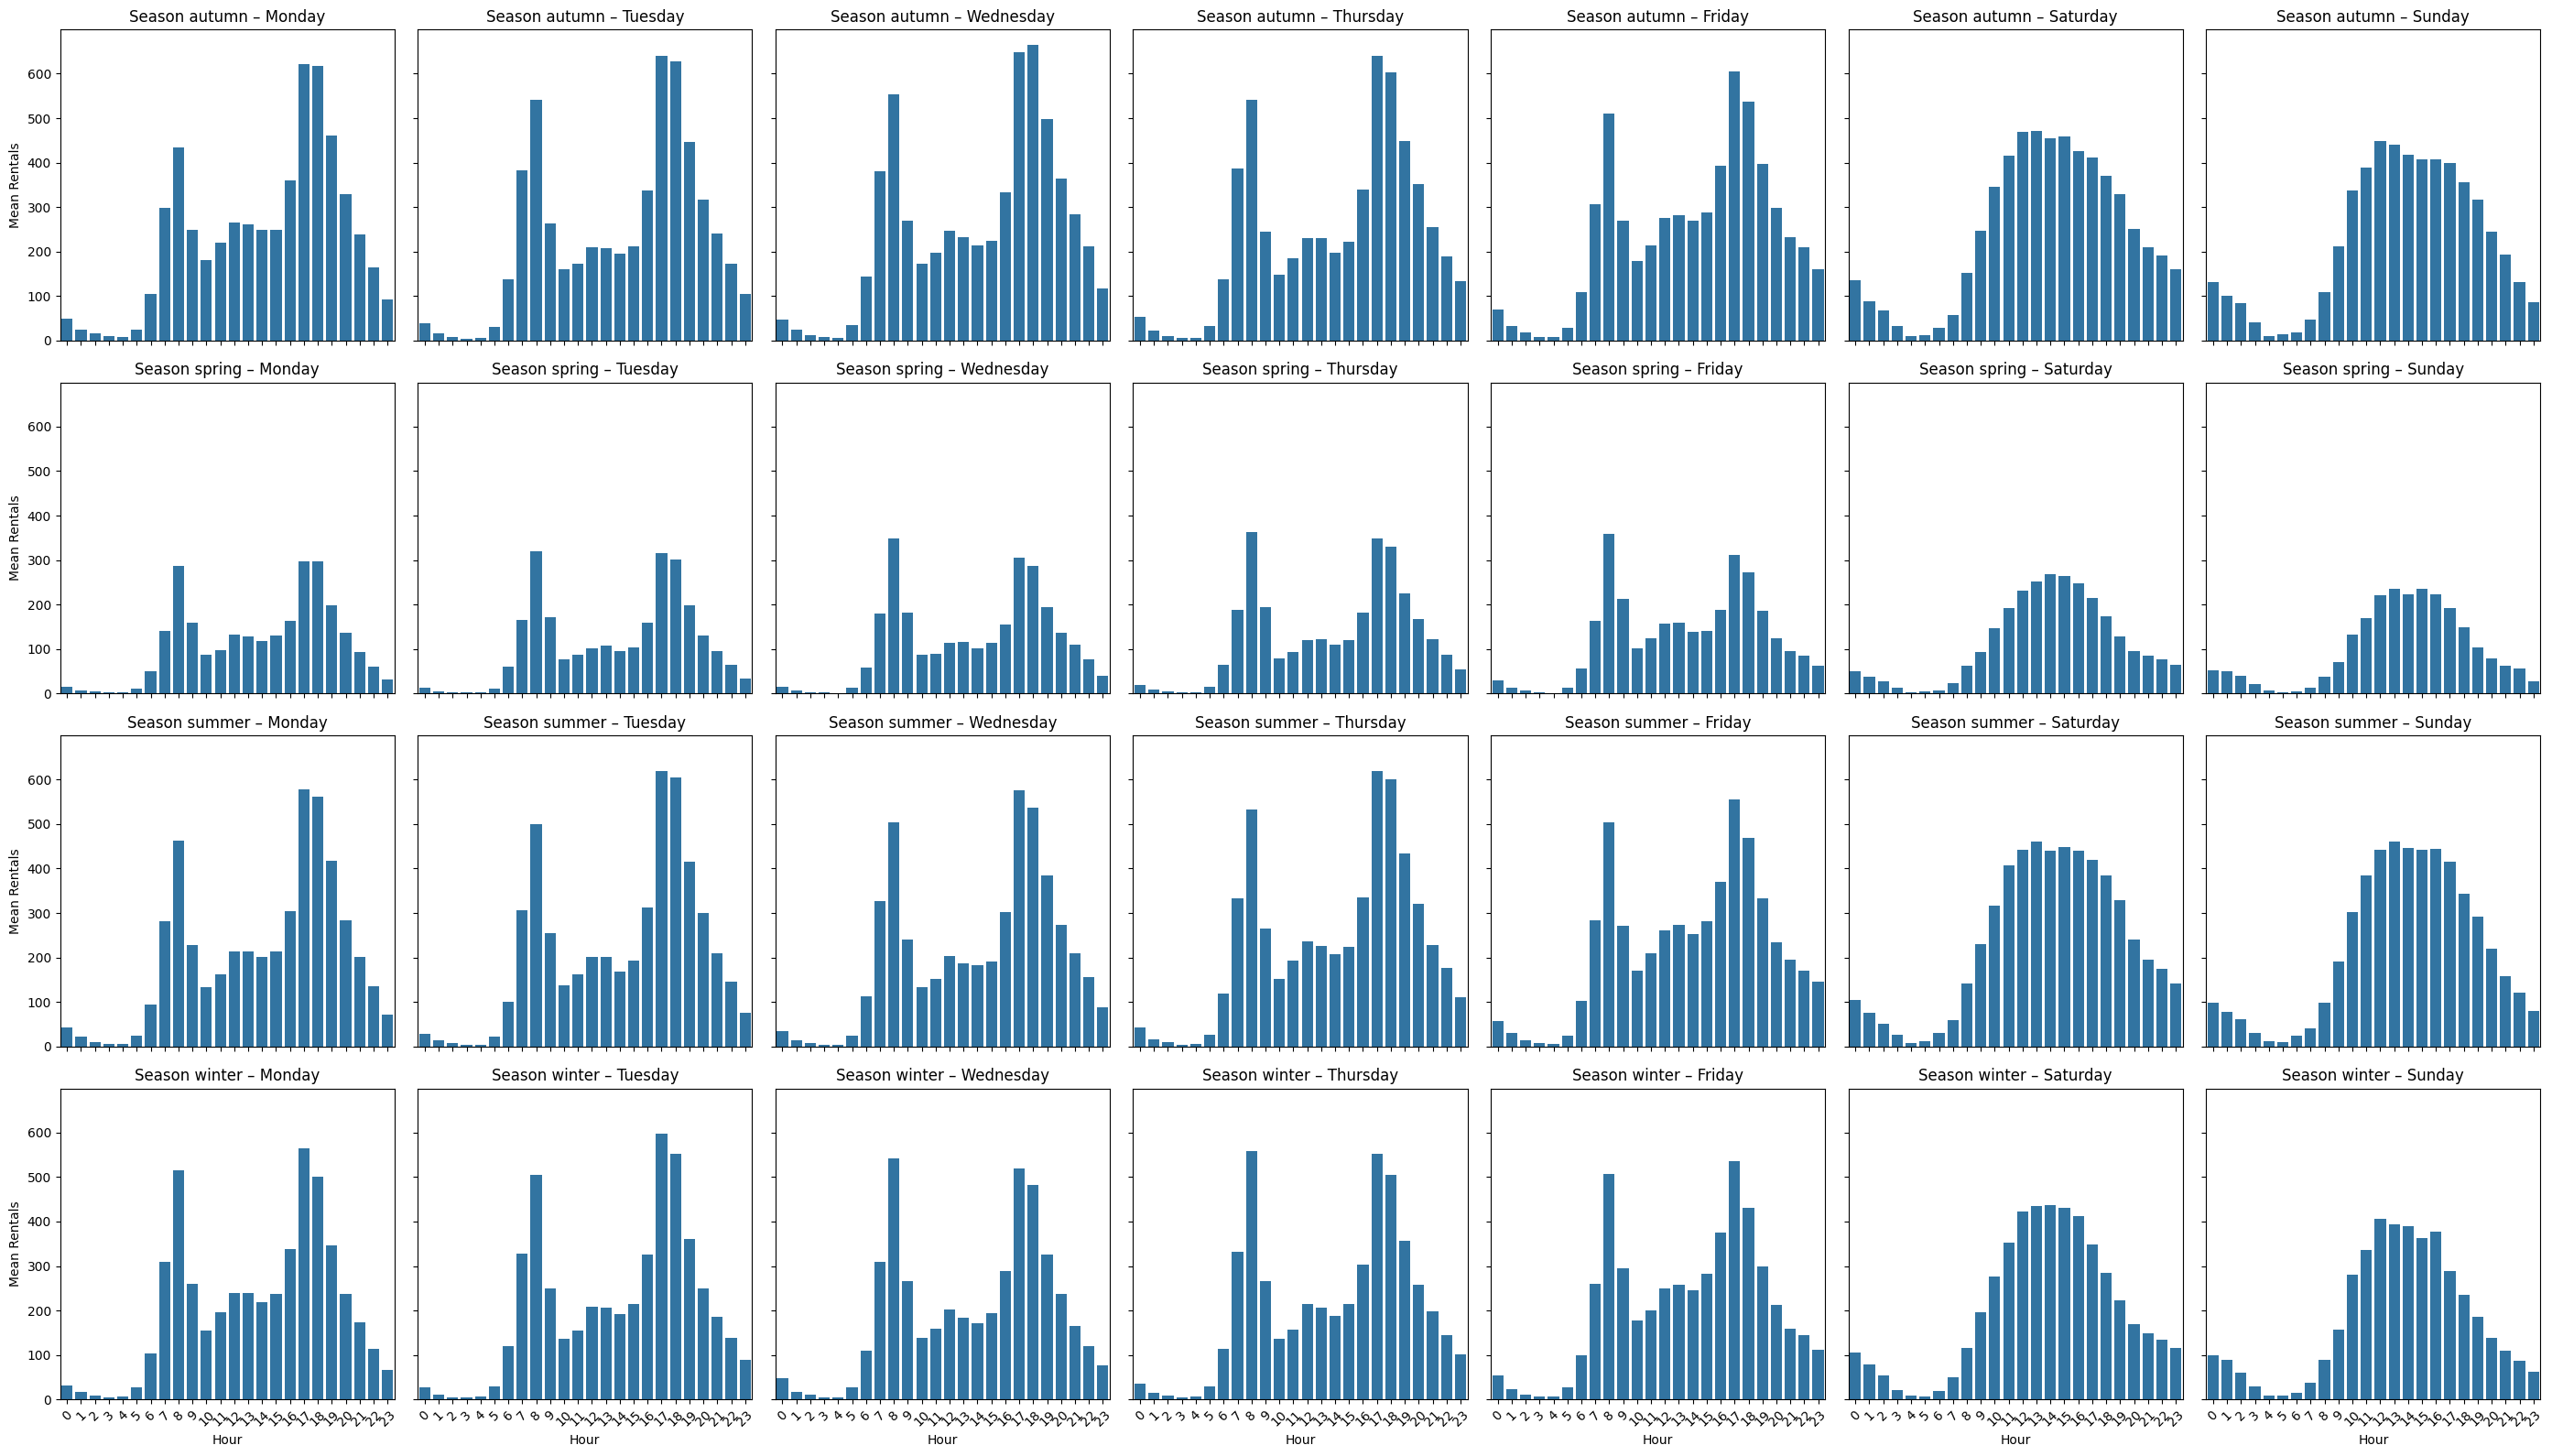

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt


df['season'] = df['season']          
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

hour_dow_mean = (
    df.groupby(['season', 'day_of_week', 'hour'], observed=True)['count']
      .mean()
      .reset_index()
)


season_order = sorted(hour_dow_mean['season'].unique())

weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]

fig, axes = plt.subplots(
    nrows=len(season_order),
    ncols=len(weekday_order),
    figsize=(4 * len(weekday_order), 4 * len(season_order)),
    sharey=True,
    sharex=True
)

for i, season in enumerate(season_order):
    for j, weekday in enumerate(weekday_order):
        ax = axes[i][j]

        data = hour_dow_mean[
            (hour_dow_mean['season'] == season) &
            (hour_dow_mean['day_of_week'] == weekday)
        ]

        sns.barplot(
            data=data,
            x='hour',
            y='count',
            ax=ax
        )

        ax.set_title(f'Season {season} – {weekday}')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Mean Rentals' if j == 0 else '')
        ax.set_xticks(range(0, 24))
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The best season is Summer Saturday at 17:00, also in Autumn. Spring is the worst season for rentals. The weekend has approximately normal distribution

### 10. Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

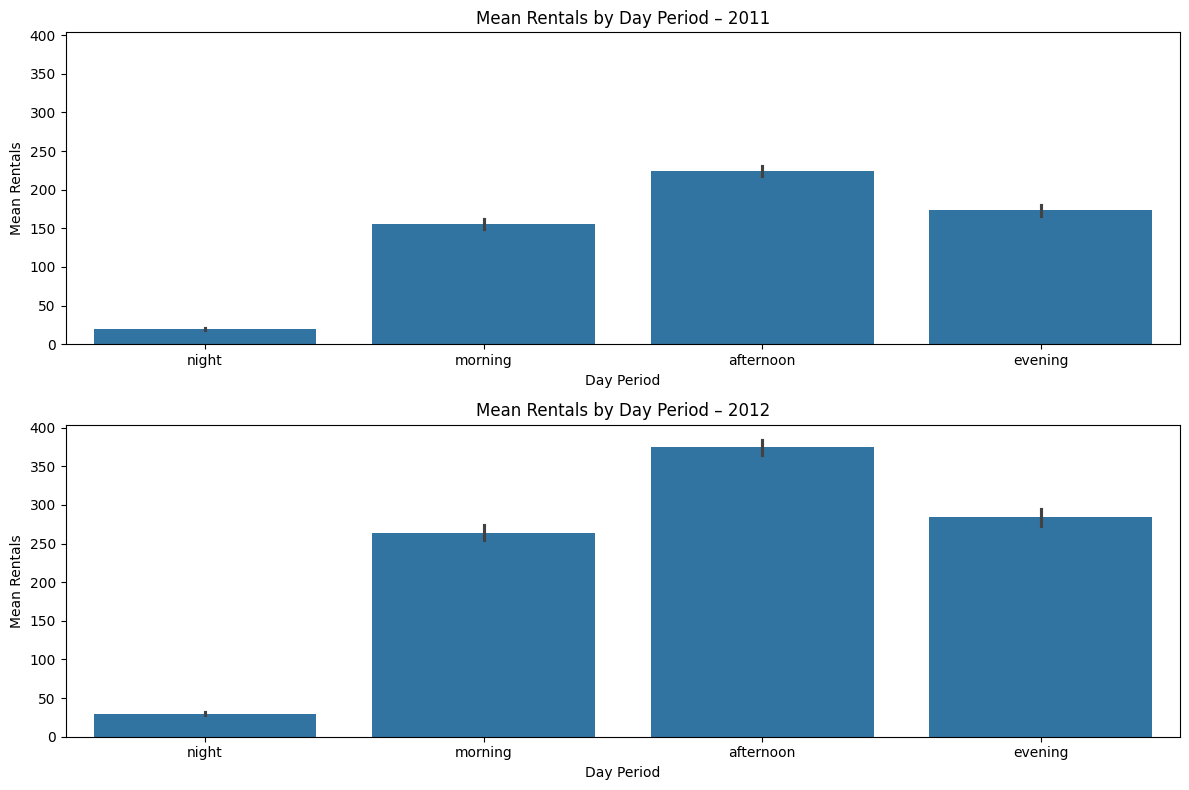

In [136]:
df['year'] = df['datetime'].dt.year

dayperiod_mean = (
    df.groupby(['year', 'day_period'], observed=True)['count']
      .mean()
      .reset_index()
)

years = dayperiod_mean['year'].unique()

fig, axes = plt.subplots(
    nrows=len(years),
    ncols=1,
    figsize=(12, 4 * len(years)),
    sharey=True
)

for ax, year in zip(axes, years):
   
    data = df[df['year'] == year]

    sns.barplot(
        data=data,
        x='day_period',
        y='count',
        ax=ax,
        errorbar=('ci', 95)   
    )

    ax.set_title(f'Mean Rentals by Day Period – {year}')
    ax.set_xlabel('Day Period')
    ax.set_ylabel('Mean Rentals')

plt.tight_layout()
plt.show()

As we expected, the afternoon is the period of time when the people rent the most. 

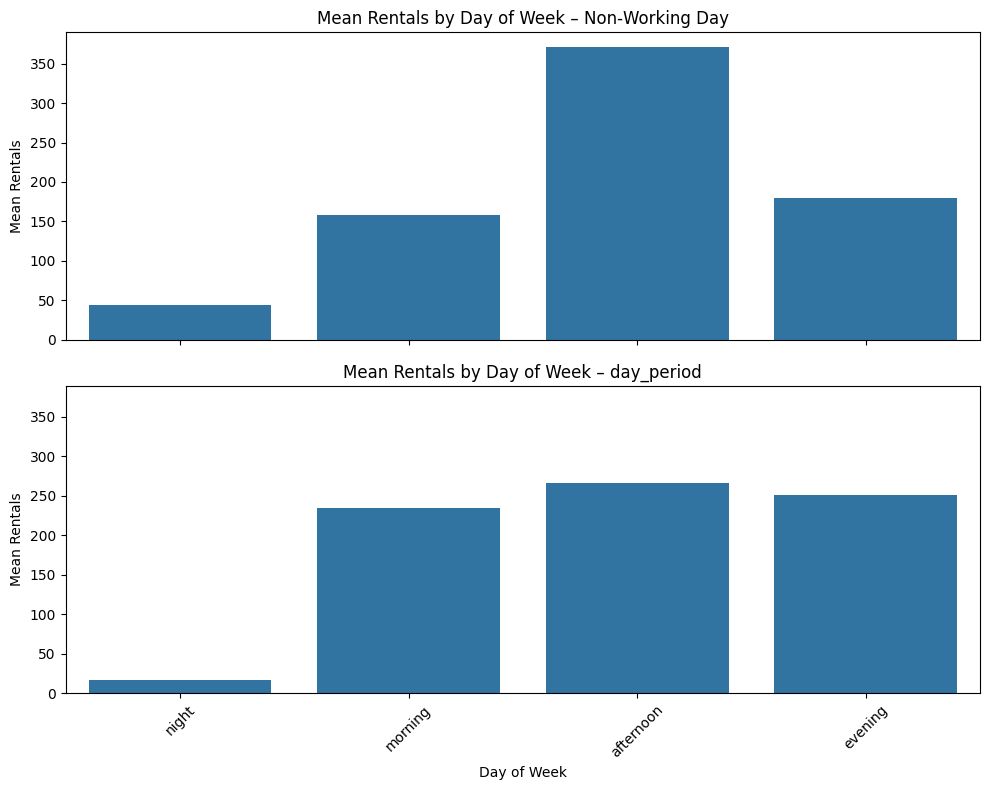

In [146]:

df['day_of_week'] = df['datetime'].dt.day_name()

dow_mean = (
    df.groupby(['workingday', 'day_period'], observed=True)['count']
      .mean()
      .reset_index()
)


fig, axes = plt.subplots(
    nrows=len(workingdays),
    ncols=1,
    figsize=(10, 4 * len(workingdays)),
    sharey=True,
    sharex=True
)



for i, wd in enumerate(workingdays):
    ax = axes[i]

    data = dow_mean[dow_mean['workingday'] == wd]

    sns.barplot(
        data=data,
        x='day_period',
        y='count',
        ax=ax
    )

    label = "day_period" if wd == 1 else "Non‑Working Day"
    ax.set_title(f'Mean Rentals by Day of Week – {label}')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Mean Rentals')

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Its doesnt differ too much but in the afternoon of non working day we have more rents.

### 11. Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

In [149]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'day_period', 'day_of_week'],
      dtype='object')

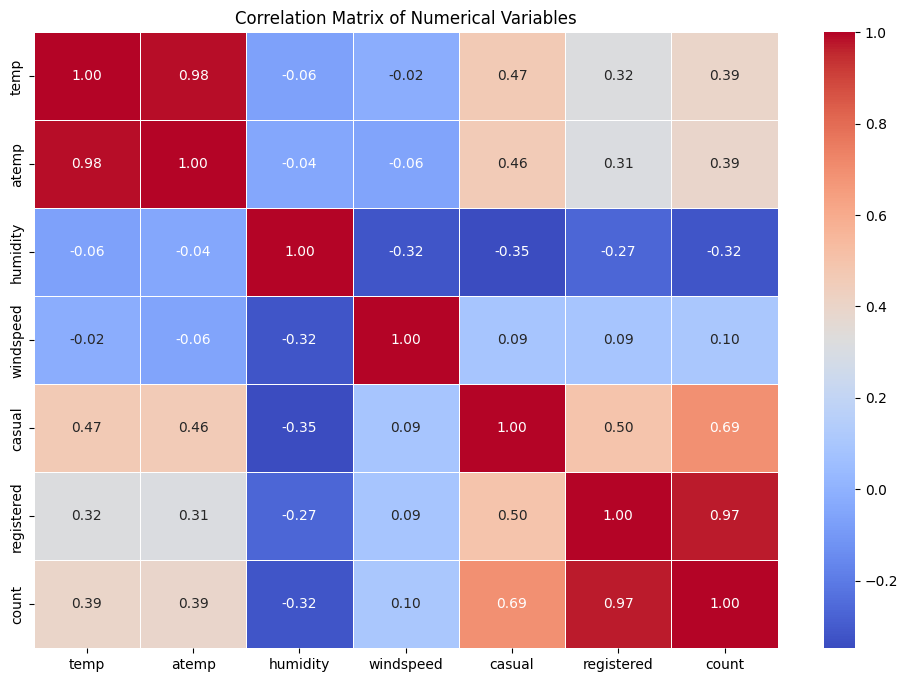

In [163]:
numeric_df = df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

There is a strong correlation between temp and atemp. Also with the casual and the temperature and sensation of temperature. In other words, the temperature is related to the number of users. The higher the temperature, the more people want to rent.
Humidity has a relationship with the wind speed.
Also the humidity has a correlation with the users because it is related to the rainy days.